In [1]:
import numpy as np
import matplotlib.pyplot as plt
import parmap
import multiprocessing as mp
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0,dK_graph,Make_empirical_KR as KR,split_uo
import pandas as pd
from TO_sim.gen_Distribution import Normal,Quantile_Normal as Q_Normal

In [2]:
cluster_size = ['c0', 'c1', 'c2', 'c3', 'c4','c5', 'c6', 'c7', 'c8', 'c9']
cluster_pvel = ['c0 phase vel', 'c1 phase vel','c2 phase vel', 'c3 phase vel', 'c4 phase vel', 'c5 phase vel','c6 phase vel', 'c7 phase vel', 'c8 phase vel', 'c9 phase vel']

In [40]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import numpy as np

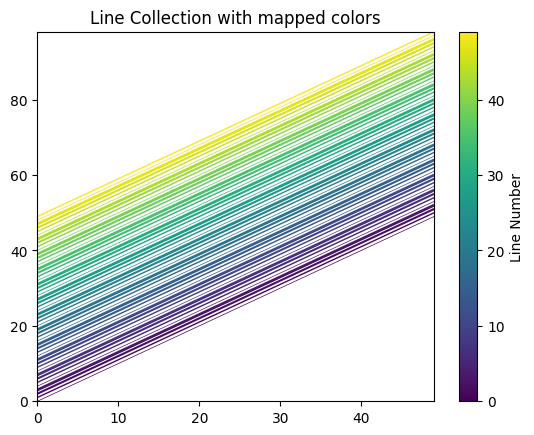

In [62]:
N = 50
x = np.arange(N)
ys = [x + i for i in x]  # Many sets of y to plot vs. x
segs = [np.column_stack([x, y]) for y in ys]

fig, ax = plt.subplots()
ax.set_xlim(np.min(x), np.max(x))
ax.set_ylim(np.min(ys), np.max(ys))

line_segments = LineCollection(segs, array=x,
                               linewidths=(0.5, 1, 1.5, 2),
                               linestyles='solid')
ax.add_collection(line_segments)
axcb = fig.colorbar(line_segments)
axcb.set_label('Line Number')
ax.set_title('Line Collection with mapped colors')
plt.sci(line_segments)  # This allows interactive changing of the colormap.
plt.show()

In [50]:
a.get_children()

TypeError: float() argument must be a string or a real number, not 'Line2D'

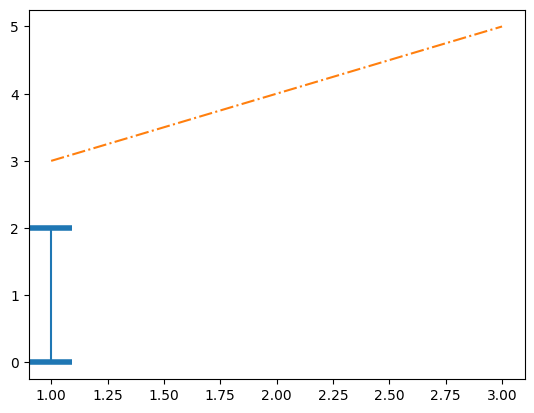

In [59]:
a = plt.errorbar(1,1,1,capthick=4,capsize=15)
a.get_children()
temp = plt.plot([1,3],[3,5],'-.')
a.get_children().append(temp)
temp.extend(a)
LineCollection(temp)
# LineCollection([*a.get_children()][:3])
# LineCollection([temp,temp,temp])
# plt.legend(temp,)

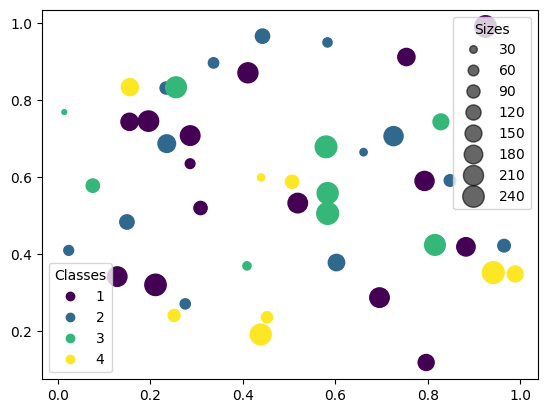

In [61]:
N = 45
x, y = np.random.rand(2, N)
c = np.random.randint(1, 5, size=N)
s = np.random.randint(10, 250, size=N)

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=c, s=s)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross-section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()

In [3]:
name = 'normal'
df_f_cluster = pd.read_excel(f'N = 500 seed = 10 dt = 0.1 {name} cluster TLO.xlsm',index_col=[0,1])

In [4]:
seed = 10
N = 500
theta_init,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega) - np.mean(omega)

In [5]:
def to_mdf(df,m):
    ms = df.reset_index().m.unique()
    re_df = df.reset_index()

    df_m = re_df[re_df.m == m]
    Ks = df_m.K.to_numpy()
    df_m = df_m.set_index('K')
    return df_m,Ks
def to_maxomega(x):
    if type(x)!= float:
        cluster = omega[np.array(list(map(int,x.split(' '))))] 
        cluster -= np.mean(cluster)
        return np.max(abs(cluster))
    else: return np.nan

In [962]:
# K_backs = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
K_backs = [3,4,5,6,10,15]
df_b_dick = {}
for K_back in  K_backs:
    df_b_dick[K_back] = pd.read_excel(f'N = 500 seed = 10 dt = 0.1 {name} {K_back}-0 TLO.xlsm',index_col=[0,1])
    
tab_color_list = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray']
df = pd.read_excel(f'N = 500 seed = 10 dt = 0.1 {name} TLO.xlsm',index_col=[0,1])


In [75]:
O_p = lambda Kr,m: (4/np.pi)*np.sqrt(Kr/m)
def get_nearest_KR(R,F_new):
    F_K,F_R = F_new
    r_idx = np.searchsorted(F_R,R)
    return F_K[r_idx],F_R[r_idx]
def get_near_o(R,F_new,m):
    F_K,F_R = F_new
    r_idx = np.searchsorted(F_R,R)
    K_new,r_new = F_K[r_idx],F_R[r_idx]
    O = O_p(K_new*r_new,m)
    return O

In [119]:
m_to_draw = 6

KF,RF,KB,RB= KR(m_to_draw)
F = KF,RF
B = KB,RB
F_new = dK_graph(F,0.05)
BU,BO = split_uo(*B)

In [120]:
df_6,Ks = to_mdf(df,m_to_draw)
K_rs = df_6.r
O_p = lambda Kr,m: (4/np.pi)*np.sqrt(Kr/m)
O_ps = (K_rs*Ks).apply(O_p,m=m_to_draw)
O_ps_n = K_rs.apply(get_near_o,F_new=F_new,m=m_to_draw)

df_m_cluster,Ks = to_mdf(df_f_cluster,m_to_draw)
df_m_r,Ks = to_mdf(df,m_to_draw)
max_o = df_m_cluster['c0 list'].apply(to_maxomega)

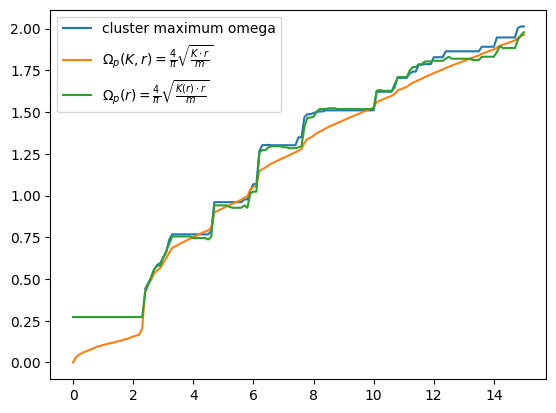

In [121]:
plt.plot(Ks,max_o,label = r'cluster maximum omega')
plt.plot(Ks,O_ps,label = r'$\Omega_p(K,r) = \frac{4}{\pi}\sqrt{\frac{K\cdot r}{m}}$')
plt.plot(Ks,O_ps_n,label=r'$\Omega_p(r) = \frac{4}{\pi}\sqrt{\frac{K(r)\cdot r}{m}}$')
plt.legend()

In [122]:
df_m_cluster,Ks = to_mdf(df_f_cluster,m_to_draw)
df_m_r,Ks = to_mdf(df,m_to_draw)
dtheta_col = [i for i in df_m_cluster.columns if ('dtheta' in i) and ('avg_dtheta' not in i)]
max_o = df_m_cluster['c0 list'].apply(to_maxomega)
D_sets = {}
U_sets = {}
for K in K_backs:
    O = max_o.loc[K]
    if ~np.isnan(O):
        D,U = KR0(m_to_draw,O)
        D_sets[K] = D
        U_sets[K] = U
    else:
        D_sets[K] = np.nan,np.nan
        U_sets[K] = np.nan,np.nan

In [123]:
O_ps.loc[K_backs]

K
3.0     0.595465
4.0     0.751126
5.0     0.925026
6.0     1.050690
10.0    1.526350
15.0    1.962722
Name: r, dtype: float64

In [124]:
O_ps.iloc[[50,51]]

K
5.0    0.925026
5.1    0.933828
Name: r, dtype: float64

In [125]:
D_sets_op = {}
U_sets_op = {}
for K in K_backs:
    O = O_ps.iloc[int(K*10)]
    O_ = max_o.loc[K]
    if ~np.isnan(O_):
        D,U = KR0(m_to_draw,O)
        D_sets_op[K] = D
        U_sets_op[K] = U
    else:
        D_sets_op[K] = np.nan,np.nan
        U_sets_op[K] = np.nan,np.nan


In [126]:
D_sets_op_n = {}
U_sets_op_n = {}
for K in K_backs:
    O = O_ps_n.iloc[int(K*10)]
    O_ = max_o.loc[K]
    if ~np.isnan(O_):
        D,U = KR0(m_to_draw,O)
        D_sets_op_n[K] = D
        U_sets_op_n[K] = U

In [127]:
backs_r = []
backs_K = []
for K_back,df_b in df_b_dick.items():

    ms = df_b.reset_index().m.unique()
    re_df = df_b.reset_index()
    df_m = re_df[re_df.m == m_to_draw]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    backs_K.append(Ks[-1])
    backs_r.append(rs[-1])

In [128]:
D_sets_op_B = {}
U_sets_op_B = {}
for K,r in zip(backs_K,backs_r):
    O = get_near_o(r,F_new,m_to_draw)
    D,U = KR0(m_to_draw,O)
    D_sets_op_B[K] = D
    U_sets_op_B[K] = U


In [129]:
def KR_underK(set,K):
    Ks,Rs = set
    K_ = Ks[Ks<K] 
    R_ = Rs[Ks<K] 
    return (K_,R_)

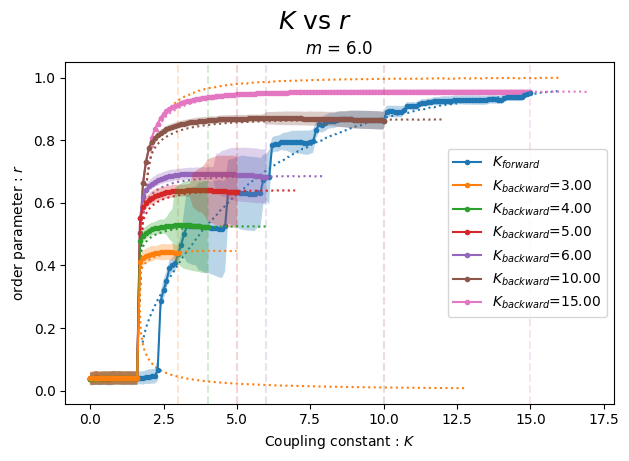

In [130]:
ms = df.reset_index().m.unique()
re_df = df.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()
plt.plot(Ks,rs,'.-',label=r'$K_{forward}$')
plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3)

backs_r = []
backs_K = []
num = len(df_b_dick)
num_c = 1
for K_back,df_b in df_b_dick.items():

    ms = df_b.reset_index().m.unique()
    re_df = df_b.reset_index()

    df_m = re_df[re_df.m == m_to_draw]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    backs_K.append(Ks[-1])
    backs_r.append(rs[-1])
    rstd = df_m.rstd.to_numpy()
    rMM= df_m.rMM.to_numpy()
    plt.axvline(K_back,ls= '--',color = tab_color_list[num_c],alpha=0.2)   
    plt.plot(Ks,rs,'.-',zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}')
    Ku,Ru = U_sets_op_B[K_back]
    if type(Ku)== float:
        plt.plot(Ku,Ru,':',color = tab_color_list[num_c],zorder= num)
    else: 
        Ku_ = Ku[Ku<K_back+2] 
        Ru_ = Ru[Ku<K_back+2] 
        plt.plot(Ku_,Ru_,':',color = tab_color_list[num_c],zorder= num)
    plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3,zorder= num)
    num -=1
    num_c +=1
plt.legend()


# plt.grid()
plt.plot(*KR_underK(F_new,16),':',color ='tab:blue',zorder=0)
plt.plot(*KR_underK(BU,16),':',color = 'tab:orange',zorder=0)
plt.plot(*KR_underK(BO,16),':',color = 'tab:orange',zorder=0)
plt.title(f'$m$ = {m_to_draw:.01f}')
plt.suptitle(r'$K$ vs $r$', fontsize =18,y=0.95)
plt.ylabel(r'order parameter : $r$')
plt.xlabel(r'Coupling constant : $K$')
plt.tight_layout()


In [131]:
ms = df.reset_index().m.unique()
re_df = df.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()

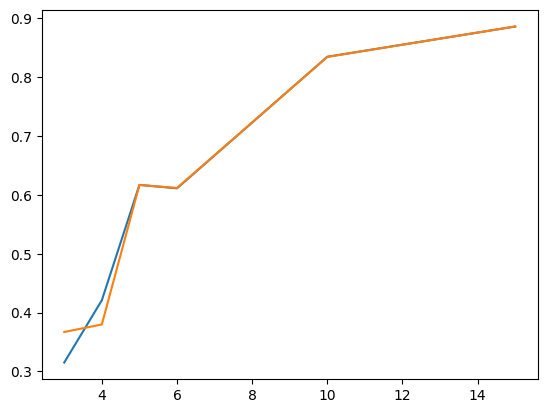

In [117]:
plt.plot(K_backs,rs[(np.array(K_backs)*10).astype(int)])
plt.plot(backs_K,backs_r)

In [64]:
KKK,RRR = F_new

In [65]:
np.searchsorted(RRR,r)

49

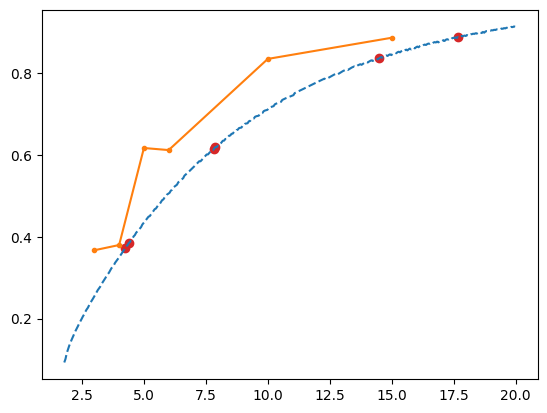

In [118]:
plt.plot(*F_new,'--',label='r_{theoritical}')
# plt.plot(K_backs,rs[(np.array(K_backs)*10).astype(int)])
plt.plot(backs_K,backs_r,'.-',color='tab:orange',zorder=10)
for r in backs_r:
    plt.scatter(*get_nearest_KR(r,F_new),color='tab:red')

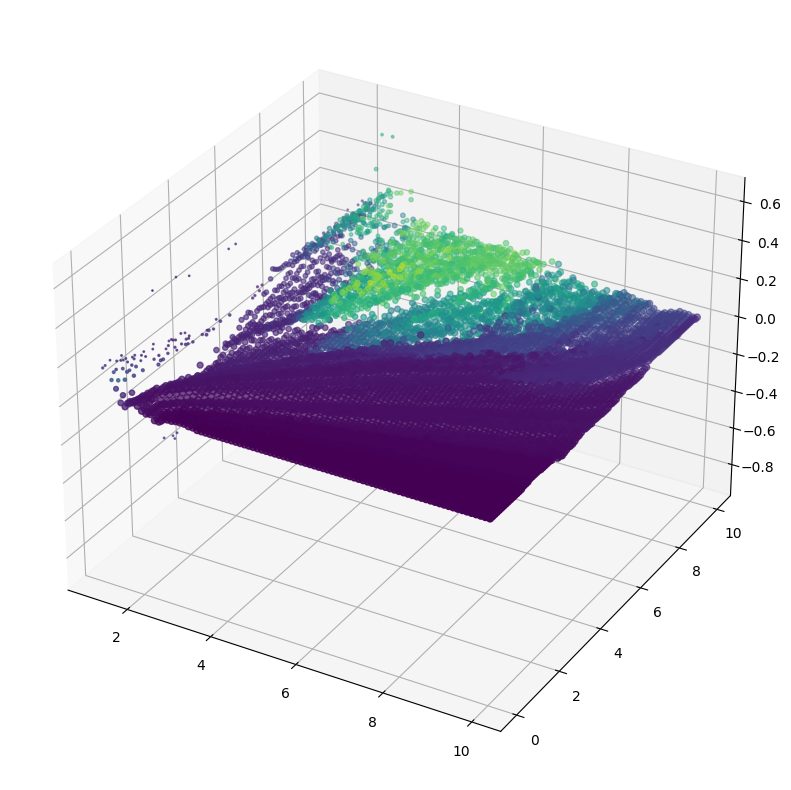

In [4]:
df_01 = pd.read_excel(f'N = 500 seed = 10 test dt = 0.1 230708 ver3.xlsm',index_col=[0,1])
# df_01.set_index(['K','m'])

# df_01 = pd.read_excel('N = 500 seed = 10 test 230627 with initial phase vel.xlsm',index_col=[0,1])
# df_01 = pd.read_excel('N = 500 seed = 10 test 230621.xlsm',index_col=[0,1])

# df_Km = df_01.reset_index(['K','m'])
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
rMM = df_01.reset_index()['rMM']
rstd = df_01.reset_index()['rstd']
Ks = df_01.reset_index().K
ms = df_01.reset_index().m
Ss_c0 = df_01.reset_index()['c0'].to_numpy()
So_c0 = df_01.reset_index()['c0 omega'].fillna(0).to_numpy()
fig = plt.figure(figsize=(10,10))
plt.subplot(projection='3d')
ax = plt.gca()
ax.scatter(Ks,ms,So_c0,c=rstd,s=Ss_c0*0.05)


In [148]:
Ss_c0 = df_01.reset_index()['c0'].to_numpy()

In [142]:
Ss_c0.shape

(15251,)

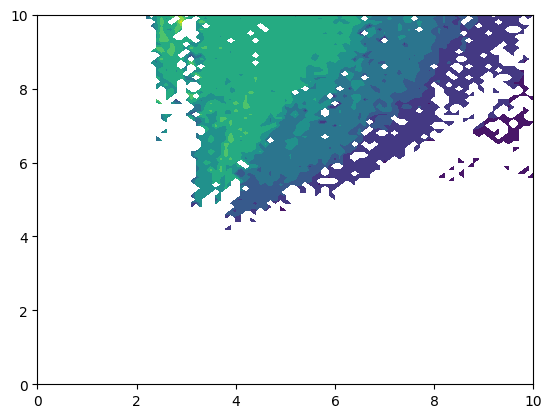

In [964]:
Ss_c1 = df_01['c1'].unstack().to_numpy()
Ss_c2 = df_01['c2'].unstack().to_numpy()
So_c0 = df_01['c0 omega'].fillna(0).to_numpy()
plt.contourf(KK,MM,Ss_c1.T+Ss_c2.T)

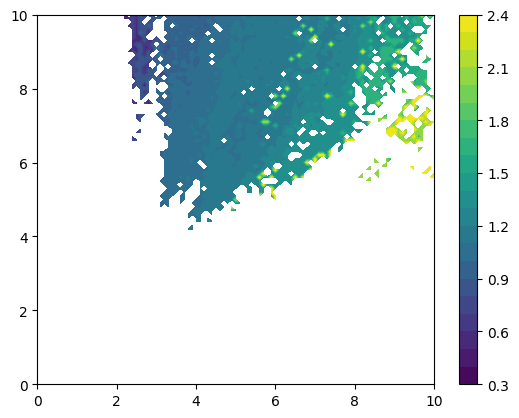

In [965]:
Ss_c3 = df_01['c1'].unstack().to_numpy()
Ss_c2 = df_01['c2'].unstack().to_numpy()
So_c0 = df_01['c2 omega'].unstack().to_numpy()
plt.contourf(KK,MM,abs(So_c0).T,levels=20)
plt.colorbar()

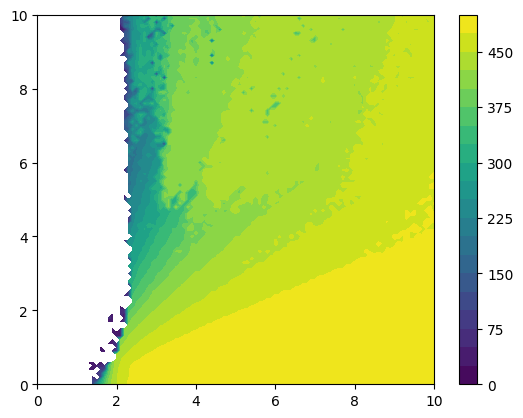

In [182]:
Ss_c3 = df_01['c0'].unstack().to_numpy()
Ss_c2 = df_01['c1'].unstack().to_numpy()

s0 = df_01['c0'].unstack().to_numpy()
s1 = df_01['c1'].unstack().fillna(0).to_numpy()
s2 = df_01['c2'].unstack().fillna(0).to_numpy()

plt.contourf(KK,MM,(s0+s1+s2).T,levels=20)
plt.colorbar()

In [185]:
c_s = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7', 'c8', 'c9']
c_o = ['c0 phase vel', 'c1 phase vel', 'c2 phase vel','c3 phase vel', 'c4 phase vel', 'c5 phase vel', 'c6 phase vel','c7 phase vel', 'c8 phase vel', 'c9 phase vel']

In [306]:
df_01.index.K

AttributeError: 'MultiIndex' object has no attribute 'K'

In [280]:
S = df_01['c0'].unstack().to_numpy()
c_s = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7', 'c8', 'c9']
c_o = ['c0 phase vel', 'c1 phase vel', 'c2 phase vel','c3 phase vel', 'c4 phase vel', 'c5 phase vel', 'c6 phase vel','c7 phase vel', 'c8 phase vel', 'c9 phase vel']
temp = np.zeros_like(S)
temp2 = np.zeros_like(S)
temp3 = np.zeros_like(S)

for s,o in zip(c_s,c_o):
    S = df_01[s].unstack().to_numpy()
    O = df_01[o].unstack().to_numpy()
    temp += np.where(abs(O)<0.2,S,0)
    temp2 += np.where((O>0.2)&(O<2.0),S,0)
    temp3 += np.where((O<-0.2)&(O>-2.0),S,0)
    print(temp)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [500. 500. 500. ... 425. 424. 424.]
 [500. 500. 500. ... 429. 429. 427.]
 [500. 500. 500. ... 434. 432. 432.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [500. 500. 500. ... 425. 424. 424.]
 [500. 500. 500. ... 429. 429. 427.]
 [500. 500. 500. ... 434. 432. 432.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [500. 500. 500. ... 425. 424. 424.]
 [500. 500. 500. ... 429. 429. 427.]
 [500. 500. 500. ... 434. 432. 432.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [500. 500. 500. ... 425. 424. 424.]
 [500. 500. 500. ... 429. 429. 427.]
 [500. 500. 500. ... 434. 432. 432.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   

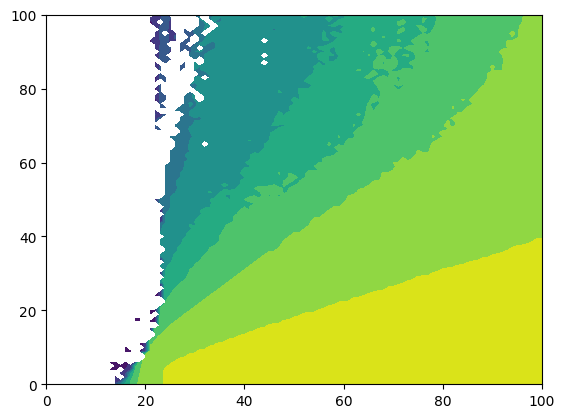

In [281]:
plt.contourf(np.where(temp.T!=0,temp.T,np.nan))

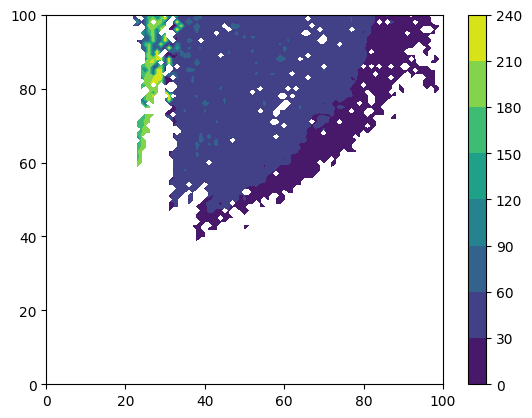

In [282]:
plt.contourf(np.where(temp2.T!=0,temp2.T,np.nan))
plt.colorbar()


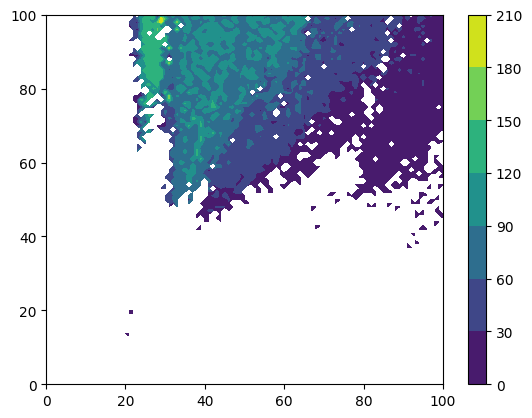

In [283]:
plt.contourf(np.where(temp3.T!=0,temp3.T,np.nan))
plt.colorbar()

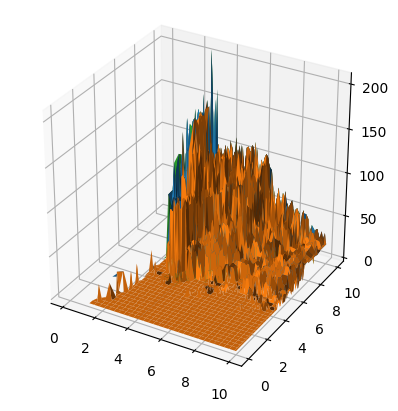

In [288]:
fig = plt.figure()
ax = plt.subplot(projection='3d')
ax.set_aspect('equal')
ax.plot_surface(KK,MM,np.where(temp3.T!=0,temp3.T,np.nan))
ax.plot_surface(KK,MM,np.where(temp.T!=0,temp3.T,np.nan))
ax.plot_surface(KK,MM,np.where(temp2.T!=0,temp3.T,np.nan))

In [216]:
np.outer([1,2,3],[1,4])

array([[ 1,  4],
       [ 2,  8],
       [ 3, 12]])

In [220]:
x

array([[0.00000000e+00, 3.17279335e-01, 6.34239197e-01, ...,
        6.34239197e-01, 3.17279335e-01, 1.22464680e-15],
       [0.00000000e+00, 3.16640549e-01, 6.32962268e-01, ...,
        6.32962268e-01, 3.16640549e-01, 1.22218119e-15],
       [0.00000000e+00, 3.14726763e-01, 6.29136624e-01, ...,
        6.29136624e-01, 3.14726763e-01, 1.21479429e-15],
       ...,
       [0.00000000e+00, 3.14726763e-01, 6.29136624e-01, ...,
        6.29136624e-01, 3.14726763e-01, 1.21479429e-15],
       [0.00000000e+00, 3.16640549e-01, 6.32962268e-01, ...,
        6.32962268e-01, 3.16640549e-01, 1.22218119e-15],
       [0.00000000e+00, 3.17279335e-01, 6.34239197e-01, ...,
        6.34239197e-01, 3.17279335e-01, 1.22464680e-15]])

<Figure size 640x480 with 0 Axes>

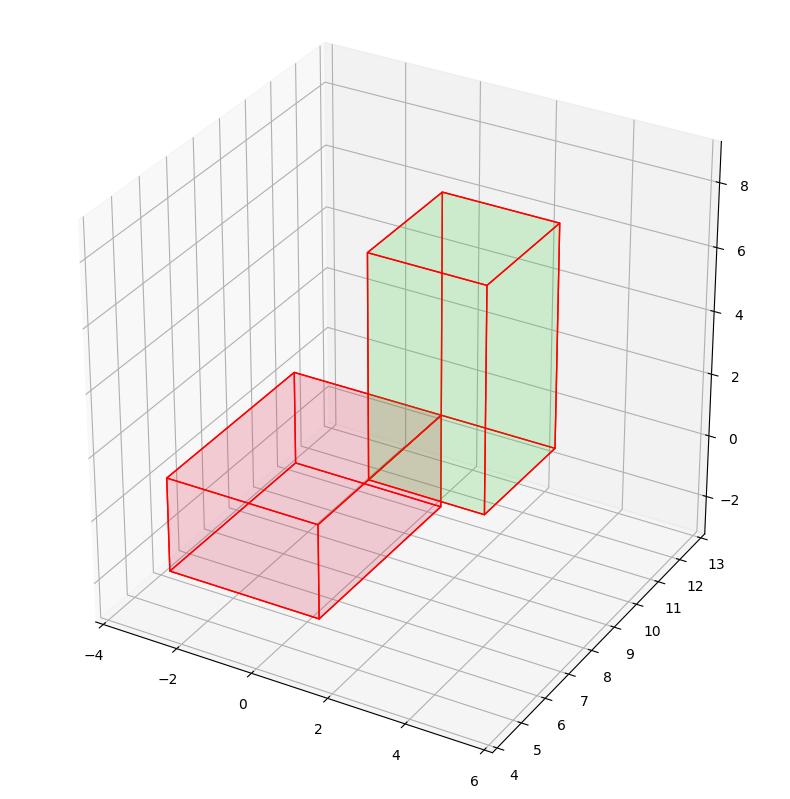

In [259]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import matplotlib.pyplot as plt

def cuboid_data2(o, size=(1,1,1)):
    X = [[[0, 1, 0], [0, 0, 0], [1, 0, 0], [1, 1, 0]],
         [[0, 0, 0], [0, 0, 1], [1, 0, 1], [1, 0, 0]],
         [[1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1]],
         [[0, 0, 1], [0, 0, 0], [0, 1, 0], [0, 1, 1]],
         [[0, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 0]],
         [[0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1]]]
    X = np.array(X).astype(float)
    for i in range(3):
        X[:,:,i] *= size[i]
    X += np.array(o)
    return X

def plotCubeAt2(positions,sizes=None,colors=None, **kwargs):
    if not isinstance(colors,(list,np.ndarray)): colors=["C0"]*len(positions)
    if not isinstance(sizes,(list,np.ndarray)): sizes=[(1,1,1)]*len(positions)
    g = []
    for p,s,c in zip(positions,sizes,colors):
        g.append( cuboid_data2(p, size=s) )
    return Poly3DCollection(np.concatenate(g),  
                            facecolors=np.repeat(colors,6), **kwargs)
    

pc = plotCubeAt2(positions,sizes,colors=colors, edgecolor="r",alpha=0.1)
ax.add_collection3d(pc)    
positions = [(-3,5,-2),(1,7,1)]
sizes = [(4,5,3), (3,3,7)]
colors = ["crimson","limegreen"]

fig = plt.figure()
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(projection='3d')
ax.set_aspect('equal')

pc = plotCubeAt2(positions,sizes,colors=colors, edgecolor="r",alpha=0.1)
ax.add_collection3d(pc)    

ax.set_xlim([-4,6])
ax.set_ylim([4,13])
ax.set_zlim([-3,9])

plt.show()

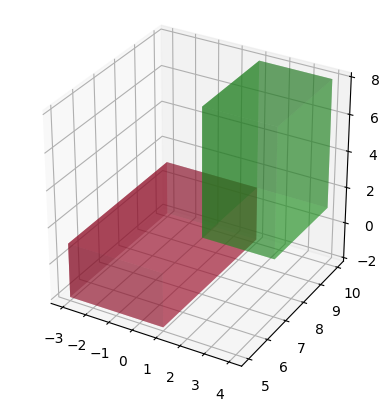

In [248]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

def cuboid_data(o, size=(1,1,1)):
    # code taken from
    # https://stackoverflow.com/a/35978146/4124317
    # suppose axis direction: x: to left; y: to inside; z: to upper
    # get the length, width, and height
    l, w, h = size
    x = [[o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]]]  
    y = [[o[1], o[1], o[1] + w, o[1] + w, o[1]],  
         [o[1], o[1], o[1] + w, o[1] + w, o[1]],  
         [o[1], o[1], o[1], o[1], o[1]],          
         [o[1] + w, o[1] + w, o[1] + w, o[1] + w, o[1] + w]]   
    z = [[o[2], o[2], o[2], o[2], o[2]],                       
         [o[2] + h, o[2] + h, o[2] + h, o[2] + h, o[2] + h],   
         [o[2], o[2], o[2] + h, o[2] + h, o[2]],               
         [o[2], o[2], o[2] + h, o[2] + h, o[2]]]               
    return np.array(x), np.array(y), np.array(z)

def plotCubeAt(pos=(0,0,0), size=(1,1,1), ax=None,**kwargs):
    # Plotting a cube element at position pos
    if ax !=None:
        X, Y, Z = cuboid_data( pos, size )
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1, **kwargs)

positions = [(-3,5,-2),(1,7,1)]
sizes = [(4,5,3), (3,3,7)]
colors = ["crimson","limegreen"]


fig = plt.figure()
ax = plt.subplot(projection='3d')
ax.set_aspect('equal')
for p,s,c in zip(positions,sizes,colors):
    plotCubeAt(pos=p, size=s, ax=ax, color=c,alpha=0.3)

plt.show()

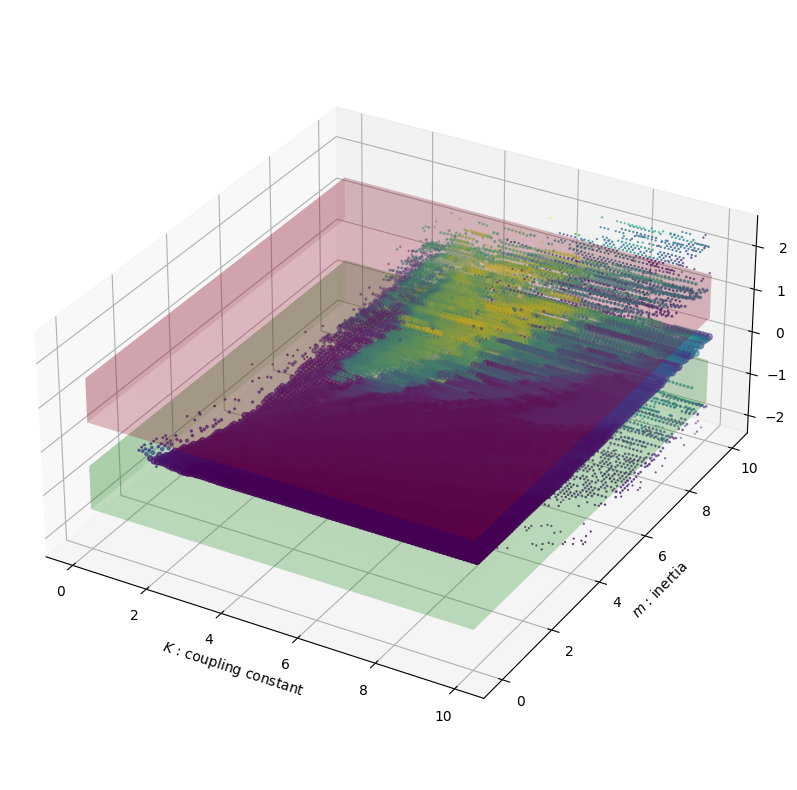

In [251]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.get_cluster import C_rsmso,cluster_os
from TO_sim.To_Draw import Draw_avg_vel_r

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap
# df = pd.read_excel('N = 500 seed = 10 test 230627.xlsm',index_col=[0,1])
# df = pd.read_excel('N = 500 seed = 10 test dt = 0.1 230708 ver3.xlsm',index_col=[0,1])
df = pd.read_excel('N = 500 seed = 10 dt = 0.01 win 10 TLO.xlsm',index_col=[0,1])
# df.set_index(['K','m'])

# df = pd.read_excel('N = 500 seed = 10 test 230627 with initial phase vel.xlsm',index_col=[0,1])
# df = pd.read_excel('N = 500 seed = 10 test 230621.xlsm',index_col=[0,1])

# df_Km = df.reset_index(['K','m'])
KK = df.index.to_frame().K.unstack().to_numpy().T
MM = df.index.to_frame().m.unstack().to_numpy().T
# origin = 'lower'
# CS = plt.contourf(KK,MM,df['rMM'].unstack().T, 20, cmap=plt.cm.viridis, origin=origin)
# CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
# plt.colorbar()
Ks = df.reset_index().K
ms = df.reset_index().m
Ss_c0 = df.reset_index()['c0'].to_numpy()
Ss_c1 = df.reset_index()['c1'].to_numpy()
Ss_c2 = df.reset_index()['c2'].to_numpy()
Ss_c3 = df.reset_index()['c3'].to_numpy()
Ss_c4 = df.reset_index()['c4'].to_numpy()
Ss_c5 = df.reset_index()['c5'].to_numpy()
Ss_c0 = df.reset_index()['c0'].to_numpy()
So_c0 = df.reset_index()['c0 omega'].fillna(0).to_numpy()
So_c1 = df.reset_index()['c1 omega'].fillna(0).to_numpy()
So_c2 = df.reset_index()['c2 omega'].fillna(0).to_numpy()
So_c3 = df.reset_index()['c3 omega'].fillna(0).to_numpy()
So_c4 = df.reset_index()['c4 omega'].fillna(0).to_numpy()
So_c5 = df.reset_index()['c5 omega'].fillna(0).to_numpy()

rMM = df.reset_index()['rMM']
rstd = df.reset_index()['rstd']


fig = plt.figure(figsize=(10,10))
plt.subplot(projection='3d')
ax = plt.gca()
ax.scatter(Ks,ms,So_c0,c=rstd,s=Ss_c0*0.05)
ax.scatter(Ks,ms,So_c1,c=rstd,s=Ss_c1*0.05)
ax.scatter(Ks,ms,So_c2,c=rstd,s=Ss_c2*0.05)
ax.scatter(Ks,ms,So_c3,c=rstd,s=Ss_c3*0.05)
ax.scatter(Ks,ms,So_c4,c=rstd,s=Ss_c4*0.05)
ax.scatter(Ks,ms,So_c5,c=rstd,s=Ss_c5*0.05)

ax.set_xlabel(r'$K$ : coupling constant')
ax.set_ylabel(r'$m$ : inertia')
ax.set_zlabel('cluster mean phase velocity')
# plt.zlim(-0.)
# plt.scatter(Ks,ms,Ss,Ss)
positions = [(0,0,0.5),(0,0,-1.5)]
sizes = [(10,10,1), (10,10,1)]
colors = ["crimson","limegreen"]

ax.set_aspect('equal')
for p,s,c in zip(positions,sizes,colors):
    plotCubeAt(pos=p, size=s, ax=ax, color=c,alpha=0.1)
plt.show()



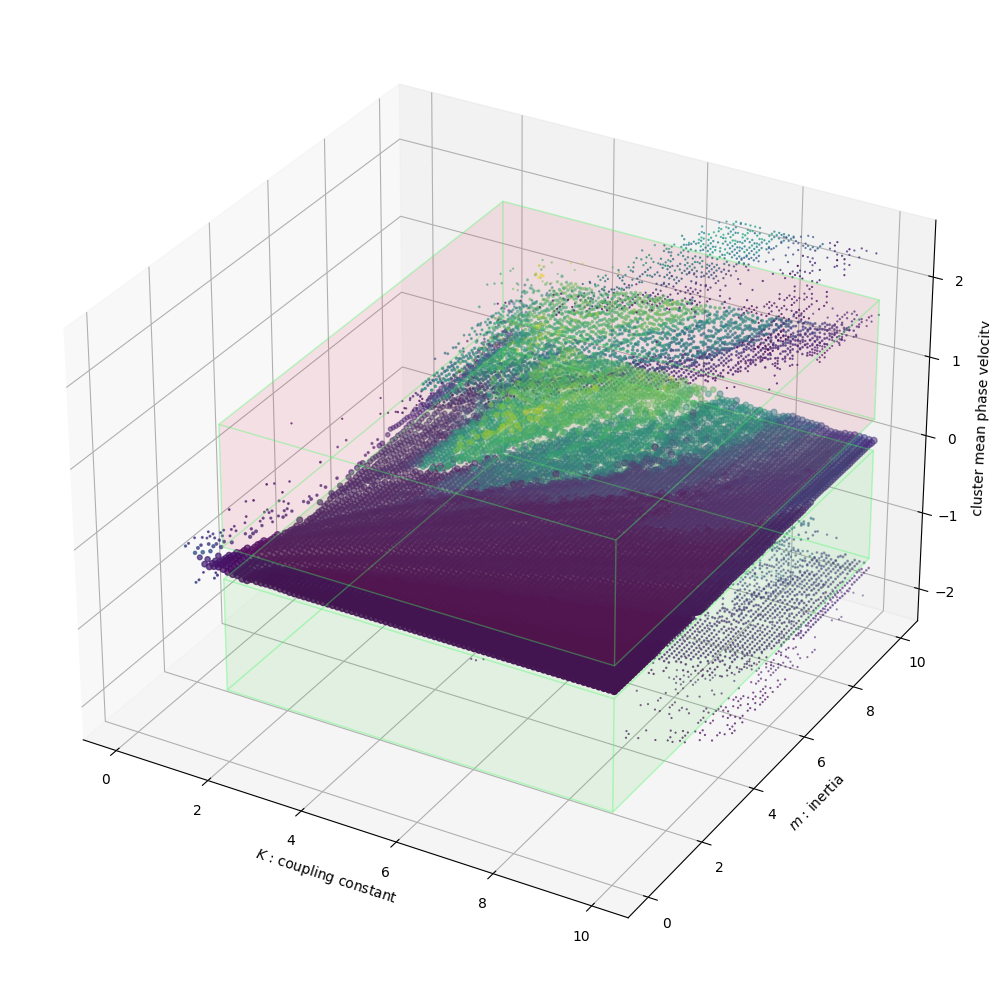

In [271]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.get_cluster import C_rsmso,cluster_os
from TO_sim.To_Draw import Draw_avg_vel_r

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap
# df = pd.read_excel('N = 500 seed = 10 test 230627.xlsm',index_col=[0,1])
# df = pd.read_excel('N = 500 seed = 10 test dt = 0.1 230708 ver3.xlsm',index_col=[0,1])

from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba 

def cuboid_data2(o, size=(1,1,1)):
    X = [[[0, 1, 0], [0, 0, 0], [1, 0, 0], [1, 1, 0]],
         [[0, 0, 0], [0, 0, 1], [1, 0, 1], [1, 0, 0]],
         [[1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1]],
         [[0, 0, 1], [0, 0, 0], [0, 1, 0], [0, 1, 1]],
         [[0, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 0]],
         [[0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1]]]
    X = np.array(X).astype(float)
    for i in range(3):
        X[:,:,i] *= size[i]
    X += np.array(o)
    return X

def plotCubeAt2(positions,sizes=None,colors=None, **kwargs):
    if not isinstance(colors,(list,np.ndarray)): colors=["C0"]*len(positions)
    if not isinstance(sizes,(list,np.ndarray)): sizes=[(1,1,1)]*len(positions)
    g = []
    for p,s,c in zip(positions,sizes,colors):
        g.append( cuboid_data2(p, size=s) )
    return Poly3DCollection(np.concatenate(g),  
                            facecolors=np.repeat(colors,6), **kwargs)
    
df = pd.read_excel('N = 500 seed = 10 test dt = 0.1 230708 ver3.xlsm',index_col=[0,1])
# df.set_index(['K','m'])

# df = pd.read_excel('N = 500 seed = 10 test 230627 with initial phase vel.xlsm',index_col=[0,1])
# df = pd.read_excel('N = 500 seed = 10 test 230621.xlsm',index_col=[0,1])

# df_Km = df.reset_index(['K','m'])
KK = df.index.to_frame().K.unstack().to_numpy().T
MM = df.index.to_frame().m.unstack().to_numpy().T
# origin = 'lower'
# CS = plt.contourf(KK,MM,df['rMM'].unstack().T, 20, cmap=plt.cm.viridis, origin=origin)
# CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
# plt.colorbar()
Ks = df.reset_index().K
ms = df.reset_index().m
Ss_c0 = df.reset_index()['c0'].to_numpy()
Ss_c1 = df.reset_index()['c1'].to_numpy()
Ss_c2 = df.reset_index()['c2'].to_numpy()
Ss_c3 = df.reset_index()['c3'].to_numpy()
Ss_c4 = df.reset_index()['c4'].to_numpy()
Ss_c5 = df.reset_index()['c5'].to_numpy()
Ss_c0 = df.reset_index()['c0'].to_numpy()
So_c0 = df.reset_index()['c0 omega'].fillna(0).to_numpy()
So_c1 = df.reset_index()['c1 omega'].fillna(0).to_numpy()
So_c2 = df.reset_index()['c2 omega'].fillna(0).to_numpy()
So_c3 = df.reset_index()['c3 omega'].fillna(0).to_numpy()
So_c4 = df.reset_index()['c4 omega'].fillna(0).to_numpy()
So_c5 = df.reset_index()['c5 omega'].fillna(0).to_numpy()

rMM = df.reset_index()['rMM']
rstd = df.reset_index()['rstd']


fig = plt.figure(figsize=(10,10))
plt.subplot(projection='3d')

ax = plt.gca()

positions = [(2,0,0.3),(2,0,-1.5)]
sizes = [(8,10,1.5), (8,10,1.4)]
colors = ["crimson","limegreen"]

# ax.set_aspect('equal') 
pc = plotCubeAt2(positions,sizes,colors=colors, edgecolor='#43ff6433',alpha=0.05)
ax.add_collection3d(pc)

ax.scatter(Ks,ms,So_c0,c=rstd,s=Ss_c0*0.05,zorder=10)
ax.scatter(Ks,ms,So_c1,c=rstd,s=Ss_c1*0.05,zorder=10)
ax.scatter(Ks,ms,So_c2,c=rstd,s=Ss_c2*0.05,zorder=10)
ax.scatter(Ks,ms,So_c3,c=rstd,s=Ss_c3*0.05,zorder=10)
ax.scatter(Ks,ms,So_c4,c=rstd,s=Ss_c4*0.05,zorder=10)
ax.scatter(Ks,ms,So_c5,c=rstd,s=Ss_c5*0.05,zorder=10)

ax.set_xlabel(r'$K$ : coupling constant')
ax.set_ylabel(r'$m$ : inertia')
ax.set_zlabel('cluster mean phase velocity')
# plt.zlim(-0.)
# plt.scatter(Ks,ms,Ss,Ss)

plt.tight_layout()
plt.show()

plt.show()





In [263]:
to_rgba('red', 0.5)

(1.0, 0.0, 0.0, 0.5)

In [420]:
KK = df.index.to_frame().K.unstack().to_numpy().T
MM = df.index.to_frame().m.unstack().to_numpy().T
surf = ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.8, cmap=cm.ocean)
cset = ax.contourf(X, Y, Z, zdir='z', offset=np.min(Z), cmap=cm.ocean)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-5, cmap=cm.ocean)
cset = ax.contourf(X, Y, Z, zdir='y', offset=5, cmap=cm.ocean)

NameError: name 'cm' is not defined

## split cluster

In [966]:
import pandas as pd
df = pd.read_excel('N = 500 seed = 10 dt = 0.1 230720 ver3.xlsm',index_col=[0,1])
# df = pd.read_excel('N = 500 seed = 10 dt = 0.1 win TLO.xlsm',index_col=[0,1])

re_df = df.reset_index()
Ks = re_df.K.unique()
ms = re_df.m.unique()

In [968]:
S = df_01['c0'].unstack().to_numpy()
c_s = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7', 'c8', 'c9']
c_o = ['c0 phase vel', 'c1 phase vel', 'c2 phase vel','c3 phase vel', 'c4 phase vel', 'c5 phase vel', 'c6 phase vel','c7 phase vel', 'c8 phase vel', 'c9 phase vel']
temp = np.zeros_like(S)
temp2 = np.zeros_like(S)
temp3 = np.zeros_like(S)
df_new = df.copy()
re_df = df.reset_index()
Ks = re_df.K.unique()
ms = re_df.m.unique()
for m in ms:
    for K in Ks:
        temp_o = df.loc[(K,m)][c_o].dropna().to_numpy()
        temp_s = df.loc[(K,m)][c_s].dropna().to_numpy()
        num_p = 0
        num_m = 0
        num_main_p = 0
        num_main_m = 0
        if len(temp_o) != 0:
            argsort = np.argsort(abs(temp_o))
            if len(argsort)==1:
                if abs(temp_o[argsort[0]]) < 0.5:
                    df_new.loc[(K,m),'main_s'] = temp_s[0]
                    df_new.loc[(K,m),'main_o'] = temp_o[0]
                else:
                    tempo = temp_o[0]
                    if tempo > 0:
                        df_new.loc[(K,m),f'p_s_{num_p}'] = temp_s[0]
                        df_new.loc[(K,m),f'p_o_{num_p}'] = temp_o[0]
                        num_p +=1
                    else:
                        df_new.loc[(K,m),f'm_s_{num_m}'] = temp_s[0]
                        df_new.loc[(K,m),f'm_o_{num_m}'] = temp_o[0]
                        num_m +=1
            else:
                if abs(temp_o[argsort[0]]) < 0.5:
                
                    df_new.loc[(K,m),'main_s'] = temp_s[argsort[0]]
                    df_new.loc[(K,m),'main_o'] = temp_o[argsort[0]]
                    for i,tempo in enumerate(temp_o[argsort[1:]],1):
                        if abs(tempo) < 0.5:
                            if tempo > 0:
                                df_new.loc[(K,m),f'main_p_s_{num_main_p}'] = temp_s[argsort[i]]
                                df_new.loc[(K,m),f'main_p_o_{num_main_p}'] = temp_o[argsort[i]]
                                num_main_p+=1
                            else: 
                                df_new.loc[(K,m),f'main_m_s_{num_main_m}'] = temp_s[argsort[i]]
                                df_new.loc[(K,m),f'main_m_o_{num_main_m}'] = temp_o[argsort[i]]
                                num_main_m+=1
                        elif abs(tempo )<2:
                            if tempo > 0:
                                df_new.loc[(K,m),f'p_s_{num_p}'] = temp_s[argsort[i]]
                                df_new.loc[(K,m),f'p_o_{num_p}'] = temp_o[argsort[i]]
                                num_p +=1
                            else:
                                df_new.loc[(K,m),f'm_s_{num_m}'] = temp_s[argsort[i]]
                                df_new.loc[(K,m),f'm_o_{num_m}'] = temp_o[argsort[i]]
                                num_m +=1

                else:
                    for i,tempo in enumerate(temp_o[argsort[1:]],1):
                        if abs(tempo)<2.0:

                            if tempo > 0:
                                df_new.loc[(K,m),f'p_s_{num_p}'] = temp_s[argsort[i]]
                                df_new.loc[(K,m),f'p_o_{num_p}'] = temp_o[argsort[i]]
                                num_p +=1
                            else:
                                df_new.loc[(K,m),f'm_s_{num_m}'] = temp_s[argsort[i]]
                                df_new.loc[(K,m),f'm_o_{num_m}'] = temp_o[argsort[i]]
                                num_m +=1

        # if abs(temp_o[argmain]) <0.5:
        #     df_new.loc[(K,m),'main_s'] = temp_s[argmain]
        #     df_new.loc[(K,m),'main_o'] = temp_o[argmain]


        # else: prinT()

In [969]:
S = df_01['c0'].unstack().to_numpy()
c_s = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7', 'c8', 'c9']
c_o = ['c0 phase vel', 'c1 phase vel', 'c2 phase vel','c3 phase vel', 'c4 phase vel', 'c5 phase vel', 'c6 phase vel','c7 phase vel', 'c8 phase vel', 'c9 phase vel']

df_new = df.copy()
re_df = df.reset_index()
Ks = re_df.K.unique()
ms = re_df.m.unique()
for m in ms:
    for K in Ks:
        temp_o = df.loc[(K,m)][c_o].dropna().to_numpy()
        temp_s = df.loc[(K,m)][c_s].dropna().to_numpy()
        o10 = temp_o[temp_s>10]
        s10 = temp_s[temp_s>10]
        num_p = 0
        num_m = 0
        if len(o10) != 0:
            if abs(o10[0])<0.5:
                df_new.loc[(K,m),'main_s'] = s10[0]
                df_new.loc[(K,m),'main_o'] = o10[0]
                o_c10 = o10[1:]
                s_c10 = s10[1:]
            else:
                o_c10 = o10[:]
                s_c10 = s10[:]
            if len(o_c10) != 0:            
                argsort = np.argsort(s_c10)[::-1]
                for i,tempo in enumerate(o_c10[argsort]):
                    if abs(tempo)<2.5:
                        if tempo > 0:
                            df_new.loc[(K,m),f'p_s_{num_p}'] = s_c10[argsort[i]]
                            df_new.loc[(K,m),f'p_o_{num_p}'] = o_c10[argsort[i]]
                            num_p +=1
                        else:
                            df_new.loc[(K,m),f'm_s_{num_m}'] = s_c10[argsort[i]]
                            df_new.loc[(K,m),f'm_o_{num_m}'] = o_c10[argsort[i]]
                            num_m +=1

        # if abs(temp_o[argmain]) <0.5:
        #     df_new.loc[(K,m),'main_s'] = temp_s[argmain]
        #     df_new.loc[(K,m),'main_o'] = temp_o[argmain]


        # else: prinT()

In [727]:
tempo

-1.526074499084398

<Axes: >

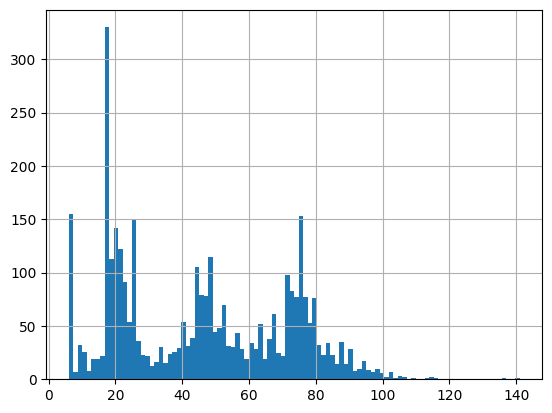

In [720]:
df['c1'].hist(bins=100)

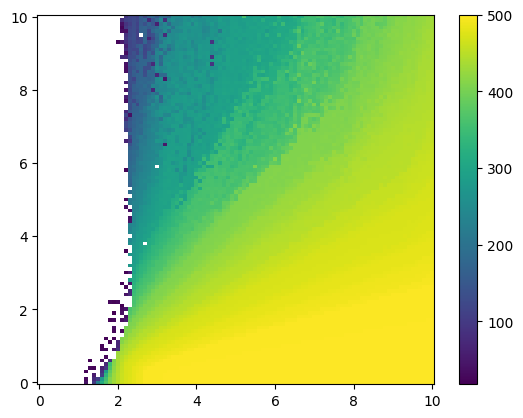

In [713]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
KK = df.index.to_frame().K.unstack().to_numpy().T
MM = df.index.to_frame().m.unstack().to_numpy().T
plt.pcolormesh(KK,MM,df_new['main_s'].unstack().to_numpy().T)
plt.colorbar()
# plt.xlim(1,3)

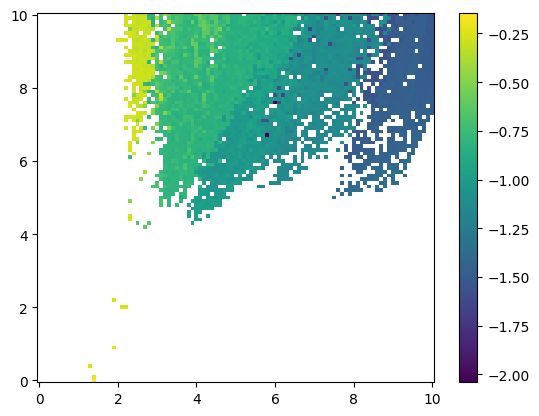

In [746]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
KK = df.index.to_frame().K.unstack().to_numpy().T
MM = df.index.to_frame().m.unstack().to_numpy().T
# plt.pcolormesh(KK,MM,df_new['main_o'].unstack().to_numpy().T)
plt.pcolormesh(KK,MM,df_new['m_o_0'].unstack().to_numpy().T)
plt.colorbar()

In [1466]:
plt.cm.cmaps_listed

{'magma': <matplotlib.colors.ListedColormap at 0x1144175d0>,
 'inferno': <matplotlib.colors.ListedColormap at 0x107b10850>,
 'plasma': <matplotlib.colors.ListedColormap at 0x114417610>,
 'viridis': <matplotlib.colors.ListedColormap at 0x114417690>,
 'cividis': <matplotlib.colors.ListedColormap at 0x1144176d0>,
 'twilight': <matplotlib.colors.ListedColormap at 0x114417710>,
 'twilight_shifted': <matplotlib.colors.ListedColormap at 0x114417750>,
 'turbo': <matplotlib.colors.ListedColormap at 0x114417790>}

In [ ]:
plt.set_theme

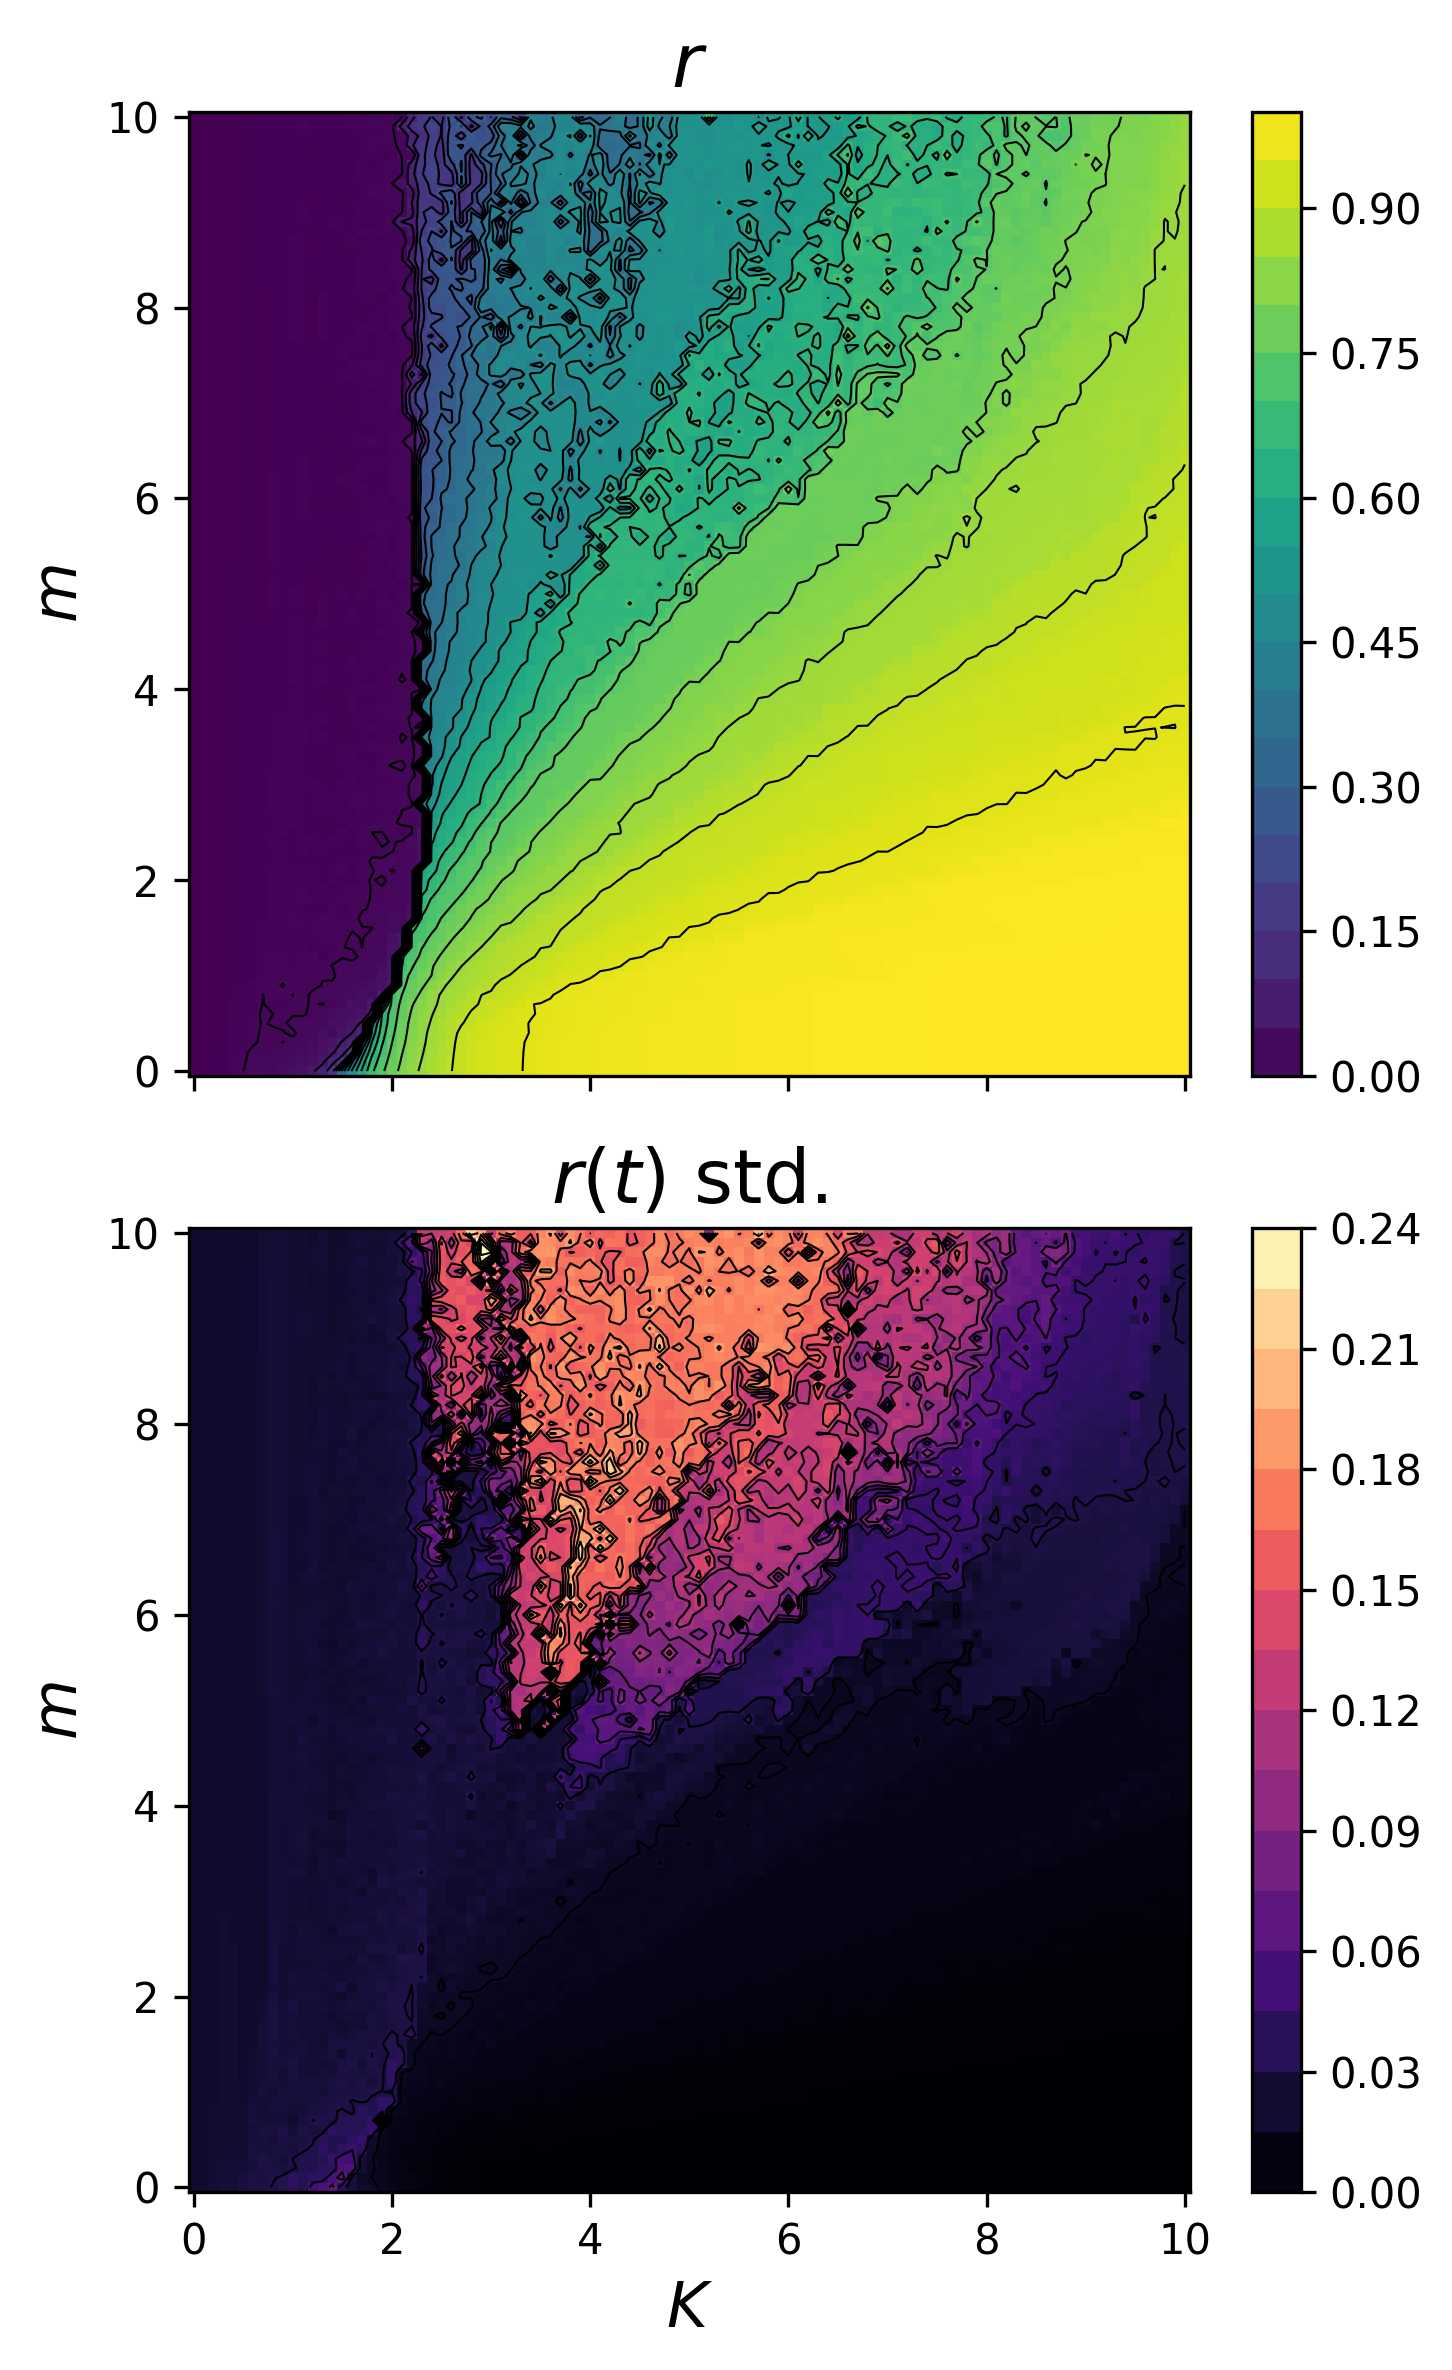

In [1474]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
origin = 'lower'
fig,(axr,axrstd)= plt.subplots(2,1,sharex=True,sharey=True,dpi=300,figsize=(5,8))

plt.sca(axr)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
To_show = df_new.unstack()['r'].to_numpy().T
CS = plt.contourf(KK,MM,To_show, 20, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='black',linewidths = 0.5, origin=origin)
plt.pcolormesh(KK,MM,To_show)
plt.colorbar(CS)
plt.ylabel(r'$m$',fontsize=15)
plt.title(r'$r$',fontsize=18)

plt.sca(axrstd)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
CS = plt.contourf(KK,MM,df_new['rstd'].unstack().to_numpy().T,20,cmap='magma')
# CS = plt.contourf(KK,MM,to_draw, lev, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.pcolormesh(KK,MM,df_new['rstd'].unstack().to_numpy().T,cmap='magma',alpha=1)
plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)
plt.title(r'$r(t)$ std.',fontsize=18)
plt.colorbar(CS)

# plt.xlabel(r'$K$',fontsize=15)


plt.tight_layout()


In [1]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
origin = 'lower'
fig,(axr,axmain)= plt.subplots(2,1,sharex=True,sharey=True,dpi=100,figsize=(5,8))

plt.sca(axr)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
To_show = df_new.unstack()['r'].to_numpy().T
CS = plt.contourf(KK,MM,To_show, 20, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='black',linewidths = 0.5, origin=origin)
plt.pcolormesh(KK,MM,To_show)
plt.colorbar(CS)
plt.ylabel(r'$m$',fontsize=15)
plt.title(r'$r$',fontsize=18)

plt.sca(axmain)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
CS = plt.contourf(KK,MM,df_new['main_s'].unstack().to_numpy().T,20,cmap='magma')
# CS = plt.contourf(KK,MM,to_draw, lev, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.pcolormesh(KK,MM,df_new['main_s'].unstack().to_numpy().T,cmap='magma',alpha=1)
plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)
plt.title('main cluster size',fontsize=18)
plt.colorbar(CS)

# plt.xlabel(r'$K$',fontsize=15)


plt.tight_layout()


NameError: name 'plt' is not defined

In [ ]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
origin = 'lower'
fig,(axr,axmain)= plt.subplots(2,1,sharex=True,sharey=True,dpi=100,figsize=(5,8))

plt.sca(axr)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
To_show = df_new.unstack()['r'].to_numpy().T
CS = plt.contourf(KK,MM,To_show, 20, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='black',linewidths = 0.5, origin=origin)
plt.pcolormesh(KK,MM,To_show)
plt.colorbar(CS)
plt.ylabel(r'$m$',fontsize=15)
plt.title(r'$r$',fontsize=18)

plt.sca(axmain)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
CS = plt.contourf(KK,MM,df_new['main_s'].unstack().to_numpy().T,20,cmap='magma')
# CS = plt.contourf(KK,MM,to_draw, lev, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.pcolormesh(KK,MM,df_new['main_s'].unstack().to_numpy().T,cmap='magma',alpha=1)
plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)
plt.title(r'$r(t)$ std.',fontsize=18)
plt.colorbar(CS)

# plt.xlabel(r'$K$',fontsize=15)


plt.tight_layout()


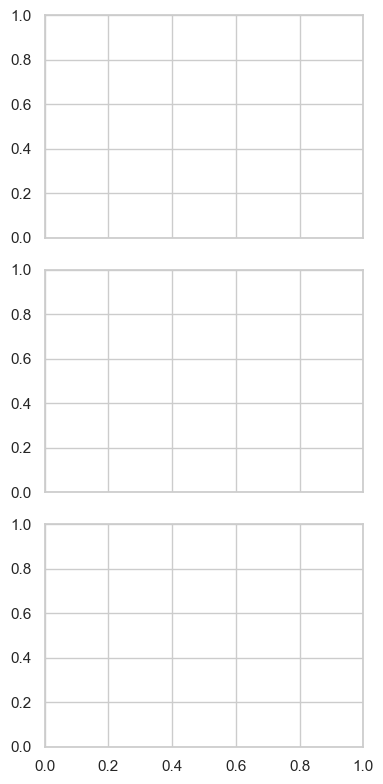

In [1600]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
origin = 'lower'
fig,(axp,axmain,axm)= plt.subplots(3,1,sharex=True,sharey=True,figsize=(4,8))

# plt.sca(axr)
# KK = df_01.index.to_frame().K.unstack().to_numpy().T
# MM = df_01.index.to_frame().m.unstack().to_numpy().T
# To_show = df_new.unstack()['r'].to_numpy().T
# CS = plt.contourf(KK,MM,To_show, 20, origin=origin)
# CS2 = plt.contour(CS, levels=CS.levels[::], colors='black',linewidths = 0.5, origin=origin)
# plt.pcolormesh(KK,MM,To_show)
# plt.colorbar(CS)
# plt.ylabel(r'$m$',fontsize=15)
# plt.title(r'$r$',fontsize=18)

# plt.sca(axrstd)
# KK = df_01.index.to_frame().K.unstack().to_numpy().T
# MM = df_01.index.to_frame().m.unstack().to_numpy().T
# CS = plt.contourf(KK,MM,df_new['rstd'].unstack().to_numpy().T,20,cmap='magma')
# # CS = plt.contourf(KK,MM,to_draw, lev, cmap=plt.cm.viridis, origin=origin)
# CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
# plt.pcolormesh(KK,MM,df_new['rstd'].unstack().to_numpy().T,cmap='magma',alpha=1)
# plt.xlabel(r'$K$',fontsize=15)
# plt.ylabel(r'$m$',fontsize=15)
# plt.title(r'$r(t)$ std.',fontsize=18)
# plt.colorbar(CS)

# plt.xlabel(r'$K$',fontsize=15)


plt.tight_layout()


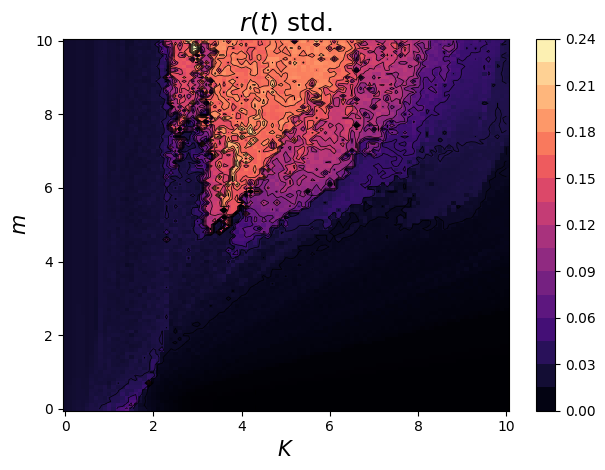

In [1460]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
CS = plt.contourf(KK,MM,df_new['rstd'].unstack().to_numpy().T,20,cmap='magma')
# CS = plt.contourf(KK,MM,to_draw, lev, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.pcolormesh(KK,MM,df_new['rstd'].unstack().to_numpy().T,cmap='magma',alpha=1)
plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)
plt.title(r'$r(t)$ std.',fontsize=18)
plt.colorbar(CS)
plt.tight_layout()


In [1486]:
import seaborn as sns

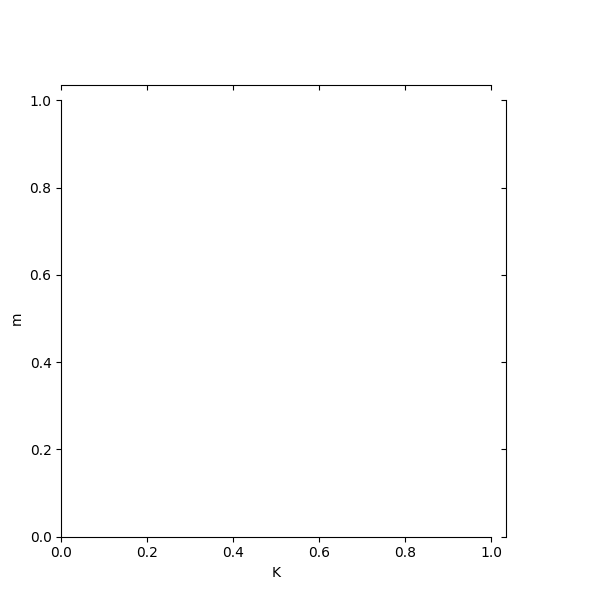

In [1489]:
sns.JointGrid(df_new.reset_index(),x='K',y='m')

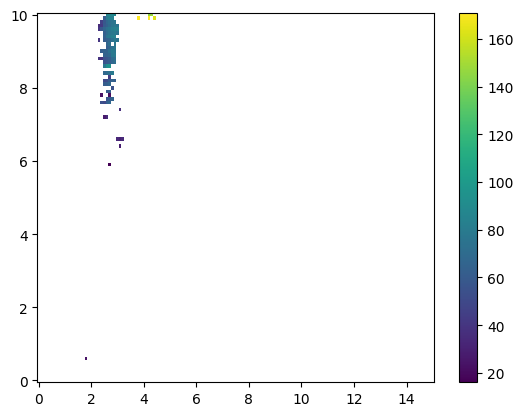

In [ ]:
KK = df.index.to_frame().K.unstack().to_numpy().T
MM = df.index.to_frame().m.unstack().to_numpy().T
plt.pcolormesh(KK,MM,df_new['main_m_s_0'].unstack().to_numpy().T)
plt.colorbar()


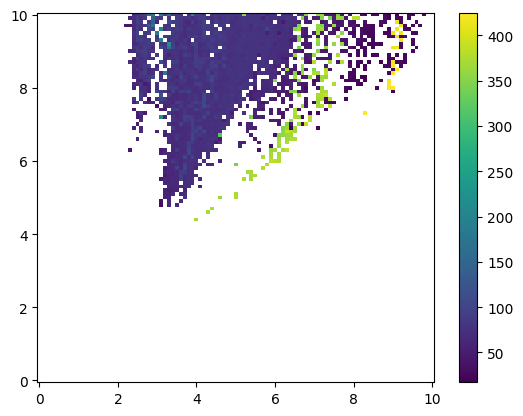

In [709]:
KK = df.index.to_frame().K.unstack().to_numpy().T
MM = df.index.to_frame().m.unstack().to_numpy().T
plt.pcolormesh(KK,MM,df_new['m_s_0'].unstack().to_numpy().T)
plt.colorbar()


In [ ]:
np.histogram2d()

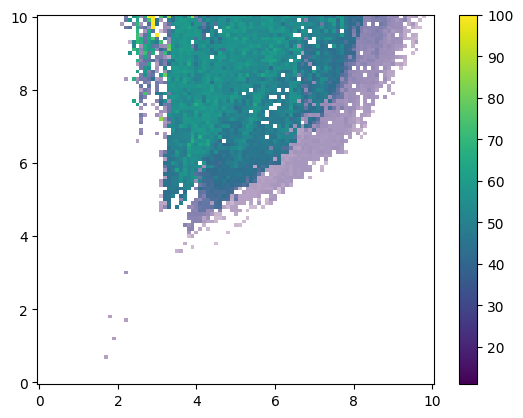

In [1453]:
KK = df_new.index.to_frame().K.unstack().to_numpy().T
MM = df_new.index.to_frame().m.unstack().to_numpy().T
A =df_new['p_s_0'].unstack().fillna(0).to_numpy().T
A_ =df_new['p_s_0'].unstack().to_numpy().T
Alpha = np.where(A/np.nanmean(A_)>1,1,A/np.nanmean(A_))
# CS = plt.contourf(KK,MM,df_new.unstack()['r'].to_numpy().T, 30, cmap=plt.cm.viridis, origin=origin,alpha=Alpha)

cs= plt.pcolormesh(KK,MM,df_new['p_s_0'].unstack().to_numpy().T,alpha=Alpha,vmax=100)
plt.colorbar(cs)


In [ ]:
print(len(abs(temp_o)<0.3))


2


In [ ]:
temp_s

array([443.,  22.])

[]

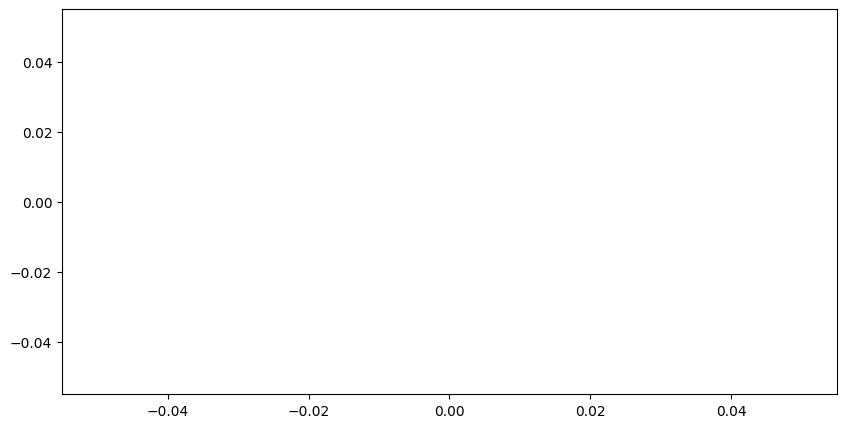

In [1021]:
plt.figure(figsize=(10,5))
plt.plot()

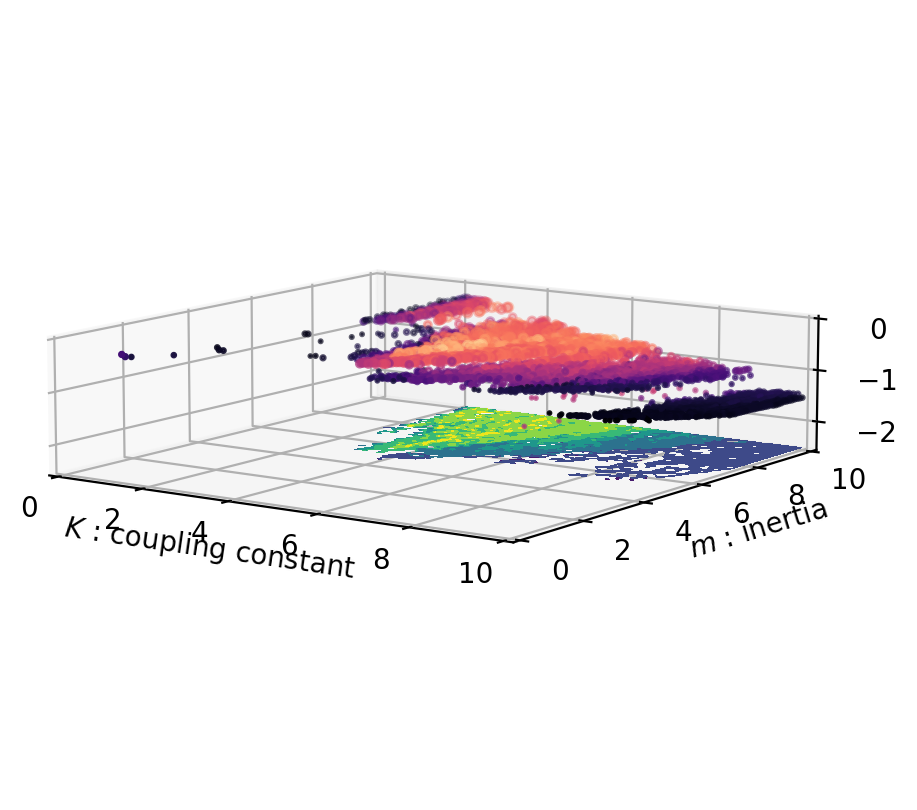

In [1340]:
fig,ax = plt.subplots(figsize=(5,5),subplot_kw={'projection':'3d'},dpi=200)
# ax.pbaspect = np.array([1, 1, 1])#np.array([2.0, 1.0, 0.5])

Ks = df_new.reset_index().K.to_numpy()
ms = df_new.reset_index().m.to_numpy()
A = df_new['m_s_0'].reset_index(drop=True).to_numpy()
B = df_new['m_o_0'].reset_index(drop=True).to_numpy()
rstd = df_new['rstd'].reset_index(drop=True).to_numpy()
ax.scatter(Ks,ms,B,c=rstd,s=A*0.1,zorder=10,cmap='magma')
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_xlabel(r'$K$ : coupling constant')
ax.set_ylabel(r'$m$ : inertia')
# ax.set_title('cluster mean phase velocity')
ax.set_zlim(-2.5,0)
ax.set_zticks([-2.,-1,-0])
ax.set_aspect('equal')

# ax.auto_scale_xyz([0, 10], [0, 10], [0.5, 10.5])
ax.view_init(elev=10., azim=-55, roll=0)
ax.contourf(KK, MM, df_new['m_s_0'].unstack().to_numpy().T, zdir='z', offset=-2.5,vmax=100)

# fig.tight_layout()
plt.savefig('23 statphys poster/minus.png',transparent=True,dpi=300)
# plt.savefig('')
# plt.show()
# ax.scatter(Ks,ms,df_new['m_s_0'].unstack().to_numpy().T,c=rstd,s=Ss_c0*0.05,zorder=10)
# ax.scatter(Ks,ms,So_c1,c=rstd,s=Ss_c1*0.05,zorder=10)

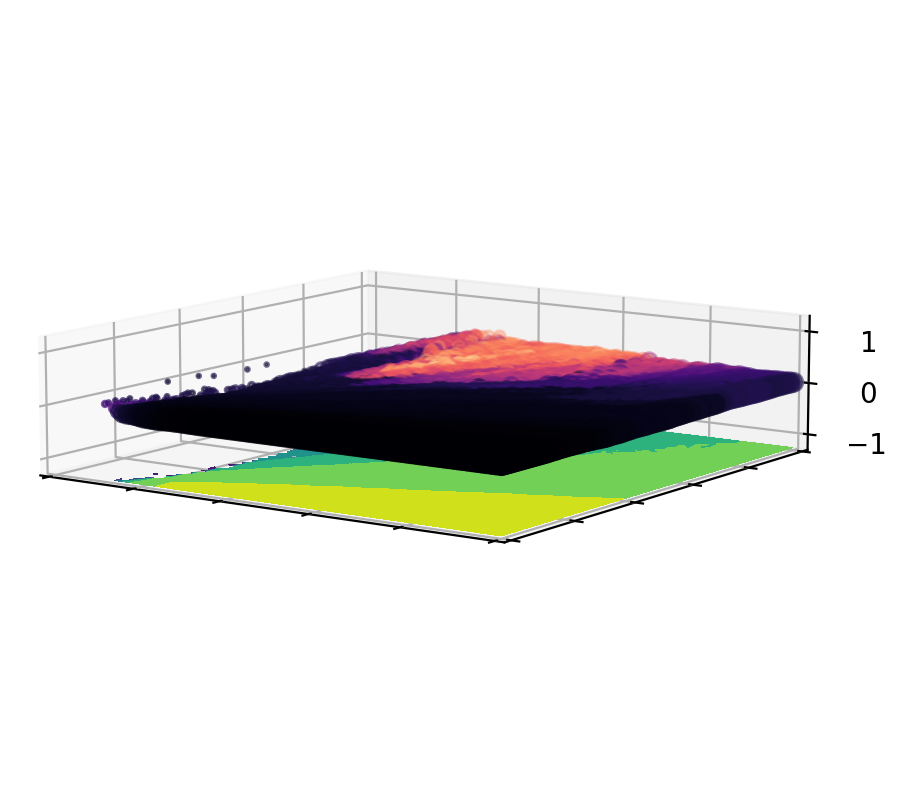

In [1341]:
fig,ax = plt.subplots(figsize=(5,5),subplot_kw={'projection':'3d'},dpi=200)
# ax.pbaspect = np.array([1, 1, 1])#np.array([2.0, 1.0, 0.5])

Ks = df_new.reset_index().K.to_numpy()
ms = df_new.reset_index().m.to_numpy()
A = df_new['main_s'].reset_index(drop=True).to_numpy()
B = df_new['main_o'].reset_index(drop=True).to_numpy()
rstd = df_new['rstd'].reset_index(drop=True).to_numpy()
ax.scatter(Ks,ms,B,c=rstd,s=A*0.1,zorder=10,cmap='magma')
ax.set_xlim(0,10)
ax.set_ylim(0,10)
# ax.set_xlabel(r'$K$ : coupling constant')
# ax.set_ylabel(r'$m$ : inertia')
# ax.set_zlabel('cluster mean phase velocity')
ax.set_zlim(-1.25,1.25)
ax.set_zticks([-1,0,1])
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
# ax.auto_scale_xyz([0, 10], [0, 10], [0.5, 10.5])
ax.view_init(elev=10., azim=-55, roll=0)
ax.contourf(KK, MM, df_new['main_s'].unstack().to_numpy().T, zdir='z', offset=-1.25)

# fig.tight_layout()
plt.savefig('23 statphys poster/main.png',transparent=True,dpi=300)
# plt.savefig('')
# plt.show()
# ax.scatter(Ks,ms,df_new['m_s_0'].unstack().to_numpy().T,c=rstd,s=Ss_c0*0.05,zorder=10)
# ax.scatter(Ks,ms,So_c1,c=rstd,s=Ss_c1*0.05,zorder=10)

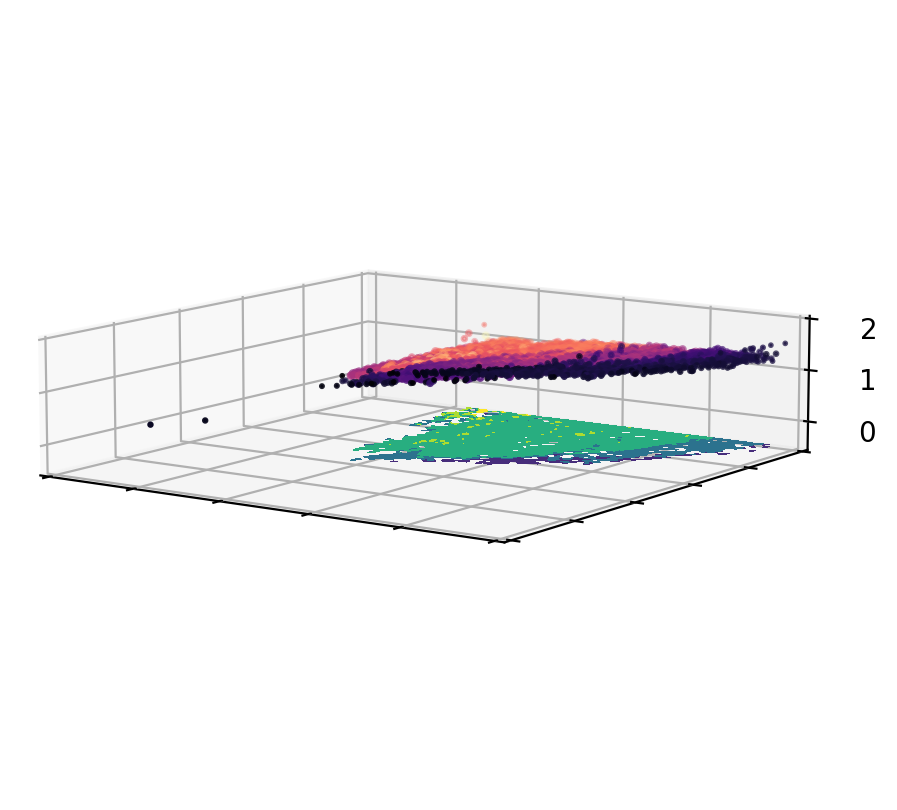

In [1342]:
fig,ax = plt.subplots(figsize=(5,5),subplot_kw={'projection':'3d'},dpi=200)
# ax.pbaspect = np.array([1, 1, 1])#np.array([2.0, 1.0, 0.5])

Ks = df_new.reset_index().K.to_numpy()
ms = df_new.reset_index().m.to_numpy()
A = df_new['p_s_0'].reset_index(drop=True).to_numpy()
B = df_new['p_o_0'].reset_index(drop=True).to_numpy()
rstd = df_new['rstd'].reset_index(drop=True).to_numpy()
ax.scatter(Ks,ms,B,c=rstd,s=A*0.1,zorder=10,cmap='magma')
ax.set_xlim(0,10)
ax.set_ylim(0,10)
# ax.set_xlabel(r'$K$ : coupling constant')
# ax.set_ylabel(r'$m$ : inertia')
# ax.set_title('cluster mean phase velocity')
ax.set_zlim(-0.5,2.0)
ax.set_zticks([0,1,2])
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
# ax.auto_scale_xyz([0, 10], [0, 10], [0.5, 10.5])
ax.view_init(elev=10., azim=-55, roll=0)
ax.contourf(KK, MM, df_new['p_s_0'].unstack().to_numpy().T, zdir='z', offset=-0.5,vmax=80)

# fig.tight_layout()
plt.savefig('23 statphys poster/plus.png',transparent=True,dpi=300)
# plt.savefig('')
# plt.show()
# ax.scatter(Ks,ms,df_new['m_s_0'].unstack().to_numpy().T,c=rstd,s=Ss_c0*0.05,zorder=10)
# ax.scatter(Ks,ms,So_c1,c=rstd,s=Ss_c1*0.05,zorder=10)

In [1151]:
ax.pbaspect

AttributeError: 'Axes3D' object has no attribute 'pbaspect'

In [1123]:
B

array([nan, nan, nan, ..., nan, nan, nan])

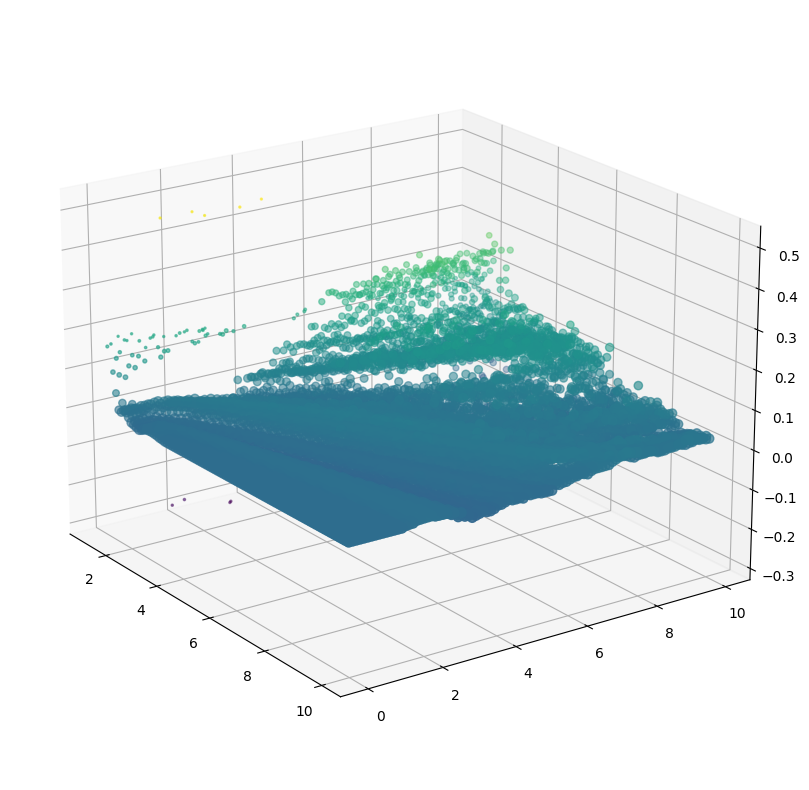

In [792]:
fig = plt.figure(figsize=(10,10))
plt.subplot(projection='3d')

ax = plt.gca()

Ks = df_new.reset_index().K.to_numpy()
ms = df_new.reset_index().m.to_numpy()
A = df_new['main_s'].reset_index(drop=True).to_numpy()
B = df_new['main_o'].reset_index(drop=True).to_numpy()
rstd = df_new['main_o'].reset_index(drop=True).to_numpy()
ax.scatter(Ks,ms,B,c=rstd,s=A*0.1,zorder=10,cmap=)
ax.view_init(elev=20., azim=-35, roll=0)
# ax.scatter(Ks,ms,B_m,c=B_m,s=A_m*0.1,zorder=10)
# ax.scatter(Ks,ms,B_p,c=B_p,s=A_p*0.1,zorder=10)
# A_p = df_new['main_p_s_0'].reset_index(drop=True).fillna(0).to_numpy()
# B_p = df_new['main_p_o_0'].reset_index(drop=True).fillna(0).to_numpy()
# A_m = df_new['main_m_s_0'].reset_index(drop=True).fillna(0).to_numpy()
# B_m = df_new['main_m_o_0'].reset_index(drop=True).fillna(0).to_numpy()
# ax.scatter(Ks,ms,df_new['m_s_0'].unstack().to_numpy().T,c=rstd,s=Ss_c0*0.05,zorder=10)
# ax.scatter(Ks,ms,So_c1,c=rstd,s=Ss_c1*0.05,zorder=10)

In [ ]:
g

In [784]:
ax.get_xlim()

(0.7600000000000008, 10.439999999999982)

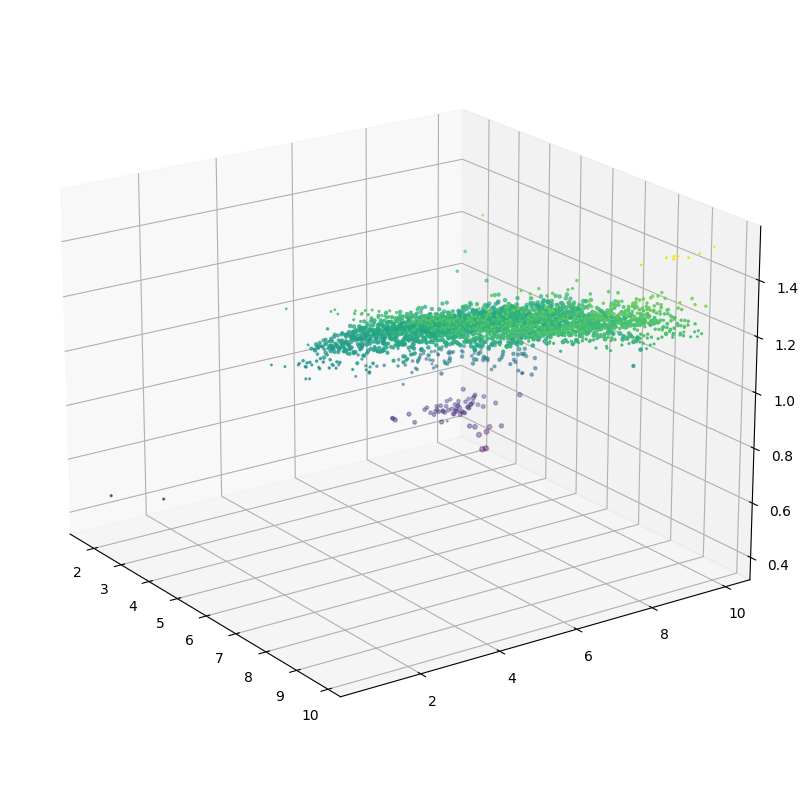

In [801]:
fig = plt.figure(figsize=(10,10))
plt.subplot(projection='3d')

ax = plt.gca()

Ks = df_new.reset_index().K.to_numpy()
ms = df_new.reset_index().m.to_numpy()
A = df_new['p_s_0'].reset_index(drop=True).to_numpy()
B = df_new['p_o_0'].reset_index(drop=True).to_numpy()
ax.scatter(Ks,ms,B,c=B,s=A*0.1,zorder=10)
ax.view_init(elev=10., azim=-55, roll=0)
# ax.view_init(90,90)
# ax.scatter(Ks,ms,B_m,c=B_m,s=A_m*0.1,zorder=10)
# ax.scatter(Ks,ms,B_p,c=B_p,s=A_p*0.1,zorder=10)
# A_p = df_new['main_p_s_0'].reset_index(drop=True).fillna(0).to_numpy()
# B_p = df_new['main_p_o_0'].reset_index(drop=True).fillna(0).to_numpy()
# A_m = df_new['main_m_s_0'].reset_index(drop=True).fillna(0).to_numpy()
# B_m = df_new['main_m_o_0'].reset_index(drop=True).fillna(0).to_numpy()
# ax.scatter(Ks,ms,df_new['m_s_0'].unstack().to_numpy().T,c=rstd,s=Ss_c0*0.05,zorder=10)
# ax.scatter(Ks,ms,So_c1,c=rstd,s=Ss_c1*0.05,zorder=10)

In [740]:
B

array([nan, nan, nan, ..., nan, nan, nan])

In [759]:
np.nanmax(ms)

115.0

In [ ]:
np.full_like()

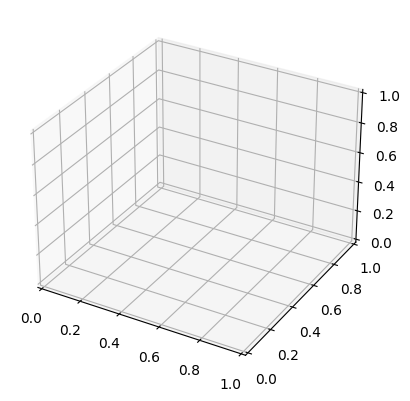

In [1069]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

In [1071]:
X.shape

(120, 120)

In [1068]:
fig = plt.figure(figsize=(10,10))
plt.subplot(projection='3d')

ax = plt.gca()

Ks_ = df_new.reset_index().K.to_numpy()
ms_ = df_new.reset_index().m.to_numpy()


mains = df_new['main_s'].reset_index(drop=True).to_numpy()
maino = df_new['main_o'].reset_index(drop=True).to_numpy()
ms = df_new['m_s_0'].reset_index(drop=True).to_numpy()
mo = df_new['m_o_0'].reset_index(drop=True).to_numpy()
ps = df_new['p_s_0'].reset_index(drop=True).to_numpy()
po = df_new['p_o_0'].reset_index(drop=True).to_numpy()
rstd = df_new['rstd'].reset_index(drop=True).to_numpy()

isna = np.isnan(po)

x,y,z = Ks_[~isna],ms_[~isna],po[~isna]
sca = ax.scatter(x, y, z, c=rstd[~isna], marker='.',cmap='plasma')

xflat = np.full_like(x, min(ax.get_xlim()))
yflat = np.full_like(y, max(ax.get_ylim()))
zflat = np.full_like(z, min(ax.get_zlim()))
ax.set_aspect('equalxy')
# ax.scatter(xflat, y, z)
# ax.scatter(x, yflat, z)

ax.contourf(KK, MM, df_new['p_o_0'].unstack().to_numpy().T, zdir='z', offset=0.5)
ax.contour(KK, MM, df_new['p_o_0'].unstack().to_numpy().T, zdir='y', offset=0)
ax.set_zlim3d(0.5,1.5)
ax.view_init(elev=15., azim=-55, roll=0)


Error in callback <function _draw_all_if_interactive at 0x114967d80> (for post_execute):


ValueError: not enough values to unpack (expected 3, got 0)

ValueError: not enough values to unpack (expected 3, got 0)

<Figure size 1000x1000 with 1 Axes>

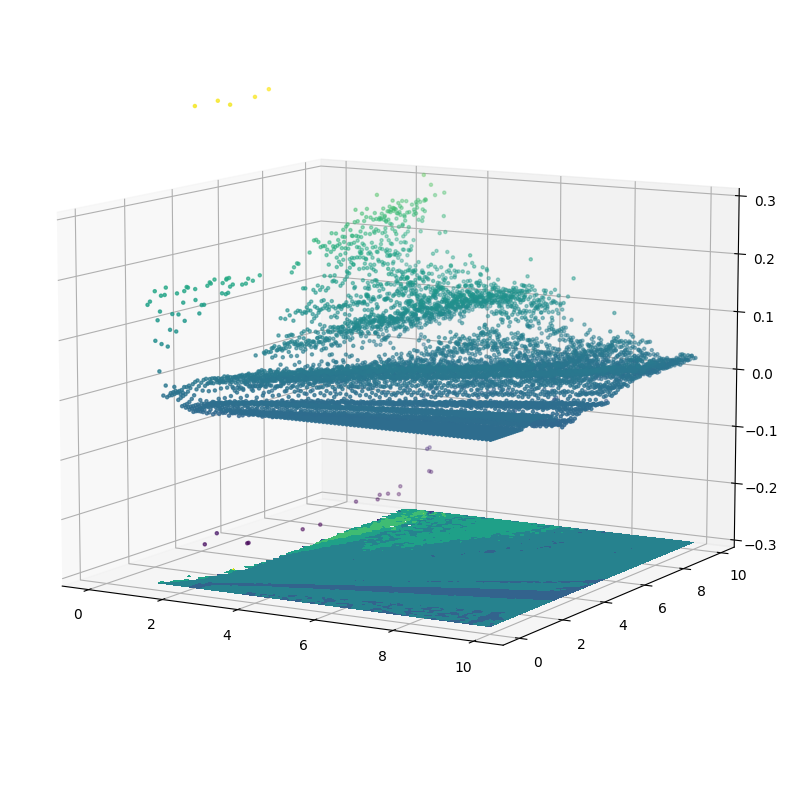

In [851]:
fig = plt.figure(figsize=(10,10))
plt.subplot(projection='3d')

ax = plt.gca()

Ks_ = df_new.reset_index().K.to_numpy()
ms_ = df_new.reset_index().m.to_numpy()
isna = np.isnan(mains)

x,y,z = Ks_[~isna],ms_[~isna],maino[~isna]
ax.scatter(x, y, z, c=z, marker='.')

xflat = np.full_like(x, min(ax.get_xlim()))
yflat = np.full_like(y, max(ax.get_ylim()))
zflat = np.full_like(z, min(ax.get_zlim()))

# ax.scatter(xflat, y, z)
# ax.scatter(x, yflat, z)

ax.contourf(KK, MM, df_new['main_o'].unstack().to_numpy().T, zdir='z', offset=-0.3)
ax.set_zlim3d(-0.3,0.3)
ax.view_init(elev=10)

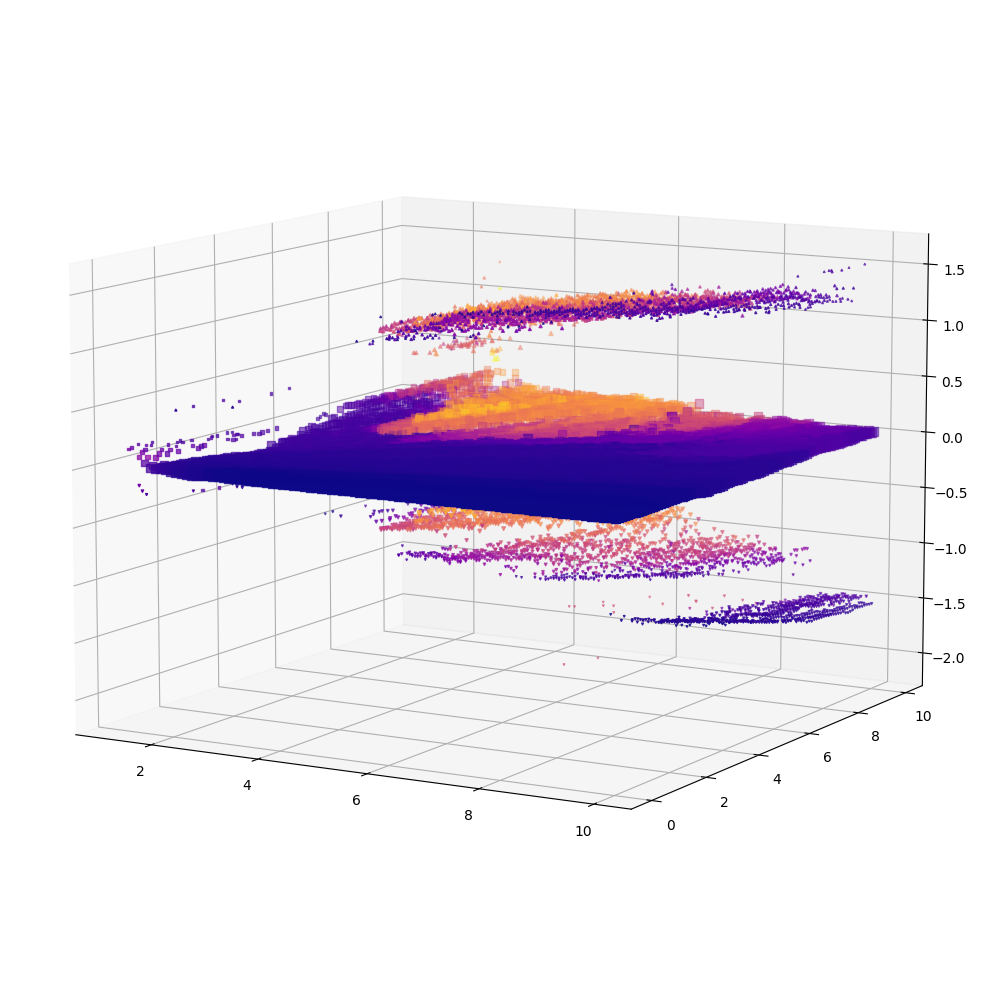

In [1142]:
fig = plt.figure(figsize=(10,10))
plt.subplot(projection='3d')

ax = plt.gca()

Ks_ = df_new.reset_index().K.to_numpy()
ms_ = df_new.reset_index().m.to_numpy()


mains = df_new['main_s'].reset_index(drop=True).to_numpy()
maino = df_new['main_o'].reset_index(drop=True).to_numpy()
ms = df_new['m_s_0'].reset_index(drop=True).to_numpy()
mo = df_new['m_o_0'].reset_index(drop=True).to_numpy()
ps = df_new['p_s_0'].reset_index(drop=True).to_numpy()
po = df_new['p_o_0'].reset_index(drop=True).to_numpy()
rstd = df_new['rstd'].reset_index(drop=True).to_numpy()
# ax.scatter(Ks_,ms_,mo,c=rstd,s=ms*0.1,zorder=1)
# ax.scatter(Ks_,ms_,maino,c=rstd,s=mains*0.1,zorder=2,alpha=0.5)
ax.view_init(elev=20., azim=-35, roll=0)
ax.scatter(Ks_,ms_,mo,c=rstd,s=ms*0.1,zorder=3,marker = 'v',cmap= 'plasma')
ax.scatter(Ks_,ms_,po,c=rstd,s=ps*0.1,zorder=3,marker = '^',cmap= 'plasma')
ax.scatter(Ks_,ms_,maino,c=rstd,s=mains*0.1,zorder=3,marker = 's',cmap= 'plasma')
# ax.view_init(0,180)

# ax.contourf(KK, MM, df_new['p_o_0'].unstack().to_numpy().T, zdir='z', offset=0)
# ax.contourf(KK, MM, df_new['m_o_0'].unstack().to_numpy().T, zdir='z', offset=-2.0)
# ax.set_zlim3d(-2.0,-0.3)
ax.view_init(elev=10)
fig.tight_layout()
plt.show()



In [647]:
plt.

0.0

In [627]:
df_new['m_s_0'].reset_index(drop=True)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
10196    19.0
10197    19.0
10198    19.0
10199    19.0
10200    19.0
Name: m_s_0, Length: 10201, dtype: float64

In [760]:
Ks = df_new.reset_index().K.to_numpy()
ms = df_new.reset_index().m.to_numpy()

In [762]:
np.max(ms)

10.0

In [892]:
import plotly.graph_objects as go
from astropy import units as u #units
from astropy.io import fits
import astropy.wcs as fitswcs #wcs
from specutils import Spectrum1D

In [3]:
def to_dict(K,m,size,vel,tp):
    data = {}
    data['K'] = K
    data['m'] = m
    data['cluster mean phase velcoity'] = vel
    data['cluster size'] = size
    data['type'] = tp
    return data


In [1421]:
df = df_01.copy()
S = df['c0'].unstack().to_numpy()
c_s = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7', 'c8', 'c9']
c_o = ['c0 phase vel', 'c1 phase vel', 'c2 phase vel','c3 phase vel', 'c4 phase vel', 'c5 phase vel', 'c6 phase vel','c7 phase vel', 'c8 phase vel', 'c9 phase vel']
temp = np.zeros_like(S)
temp2 = np.zeros_like(S)
temp3 = np.zeros_like(S)
df_new = df.copy()
re_df = df.reset_index()
Ks = re_df.K.unique()
ms = re_df.m.unique()
datas = []
for m in ms:
    for K in Ks:
        temp_o = df.loc[(K,m)][c_o].dropna().to_numpy()
        temp_s = df.loc[(K,m)][c_s].dropna().to_numpy()
        rstd = df.loc[(K,m)]['rstd']
        o10 = temp_o[temp_s>10]
        s10 = temp_s[temp_s>10]
        num_p = 0
        num_m = 0
        if len(o10) != 0:
            if abs(o10[0])<0.5:
                data = [K,m,o10[0],s10[0],'main',rstd]
                datas.append(data)
                df_new.loc[(K,m),'main_s'] = s10[0]
                df_new.loc[(K,m),'main_o'] = o10[0]
                o_c10 = o10[1:]
                s_c10 = s10[1:]
            else:
                o_c10 = o10[:]
                s_c10 = s10[:]
            if len(o_c10) != 0:            
                argsort = np.argsort(s_c10)[::-1]
                num_c_p = 0
                num_c_m = 0
                for i,tempo in enumerate(o_c10[argsort]):
                    if abs(tempo)<2.5:
                        if tempo > 0:
                            if num_c_p == 0:
                                data = [K,m,o_c10[argsort[i]],s_c10[argsort[i]],'2nd cluster(+)',rstd]
                                # num_c_p+=1
                                datas.append(data)
                            df_new.loc[(K,m),f'p_s_{num_p}'] = s_c10[argsort[i]]
                            df_new.loc[(K,m),f'p_o_{num_p}'] = o_c10[argsort[i]]
                            num_p +=1
                        elif tempo < 0:
                            if num_c_m == 0:
                                data = [K,m,o_c10[argsort[i]],s_c10[argsort[i]],'2nd cluster(-)',rstd]
                                # num_c_m+=1
                                datas.append(data)


                            df_new.loc[(K,m),f'm_s_{num_m}'] = s_c10[argsort[i]]
                            df_new.loc[(K,m),f'm_o_{num_m}'] = o_c10[argsort[i]]
                            num_m +=1

        # if abs(temp_o[argmain]) <0.5:
        #     df_new.loc[(K,m),'main_s'] = temp_s[argmain]
        #     df_new.loc[(K,m),'main_o'] = temp_o[argmain]


        # else: prinT()

NameError: name 'df_TLO' is not defined

In [1375]:
df_data = pd.DataFrame(datas,columns=['K','m','cluster mean phase velocity','cluster size','type',r'$r$\'s temporal std'])

In [1365]:
import plotly.express as px
import plotly
fig = px.scatter_3d(df_data,x='K',y='m',z='cluster mean phase velocity',color=r'$r$\'s temporal std',symbol = 'type',size='cluster size',size_max=15,opacity=0.7)
fig.show()
# fig.to_html()

In [978]:
plotly.offline.plot(fig, filename='file.html')

'file.html'

In [1273]:
plotly.offline.plot(fig, filename='Kuramoto cluster2.html')

'Kuramoto cluster2.html'

In [1367]:
df_data.to_csv('cluster2.csv')

In [1366]:
df_data.max()

K                                  10.0
m                                  10.0
cluster mean phase velocity    1.508945
cluster size                      500.0
type                               main
$r$\'s temporal std            0.230019
dtype: object

## cluster

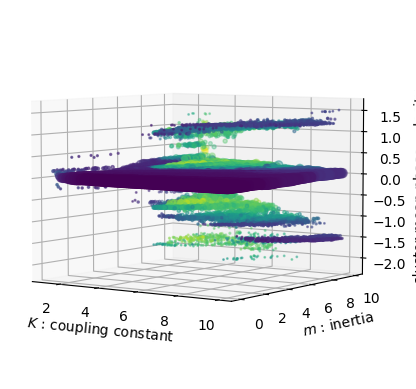

In [1040]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cluster.csv')
K = df['K']
m = df['m']
rstd = df[r'$r$\'s temporal std']
O = df['cluster mean phase velocity']
S = df['cluster size']
fig = plt.figure()
ax = plt.subplot(111,projection='3d')
ax.scatter(K,m,O,s=S*0.1,c=rstd)
ax.set_xlabel('$K$ : coupling constant')
ax.set_ylabel('$m$ : inertia')
ax.set_zlabel('cluster mean phase velocity')

ax.view_init(elev=5., azim=-55, roll=0)
plt


In [1368]:
for marker,type_ in zip(['s','v','^'],['main', '2nd cluster(-)', '2nd cluster(+)']):
    print(df_data.query(f'type == \'{type_}\'').describe())

                 K            m  cluster mean phase velocity  cluster size  \
count  8016.000000  8016.000000                  8016.000000   8016.000000   
mean      6.075062     4.947455                     0.036605    397.427021   
std       2.302242     2.942372                     0.053238     97.622617   
min       1.200000     0.000000                    -0.274599     18.000000   
25%       4.100000     2.400000                     0.003660    343.000000   
50%       6.100000     4.900000                     0.023682    428.000000   
75%       8.100000     7.500000                     0.040677    473.000000   
max      10.000000    10.000000                     0.497593    500.000000   

       $r$\'s temporal std  
count          8016.000000  
mean              0.047992  
std               0.055366  
min               0.000000  
25%               0.008442  
50%               0.022195  
75%               0.081942  
max               0.230019  
                 K            m  clu

In [ ]:
main              7990
2nd cluster(-)    3834
2nd cluster(+)

In [1320]:
df['type'].unique()


array(['main', '2nd cluster(-)', '2nd cluster(+)'], dtype=object)

In [5]:
df = pd.read_csv('cluster2.csv')

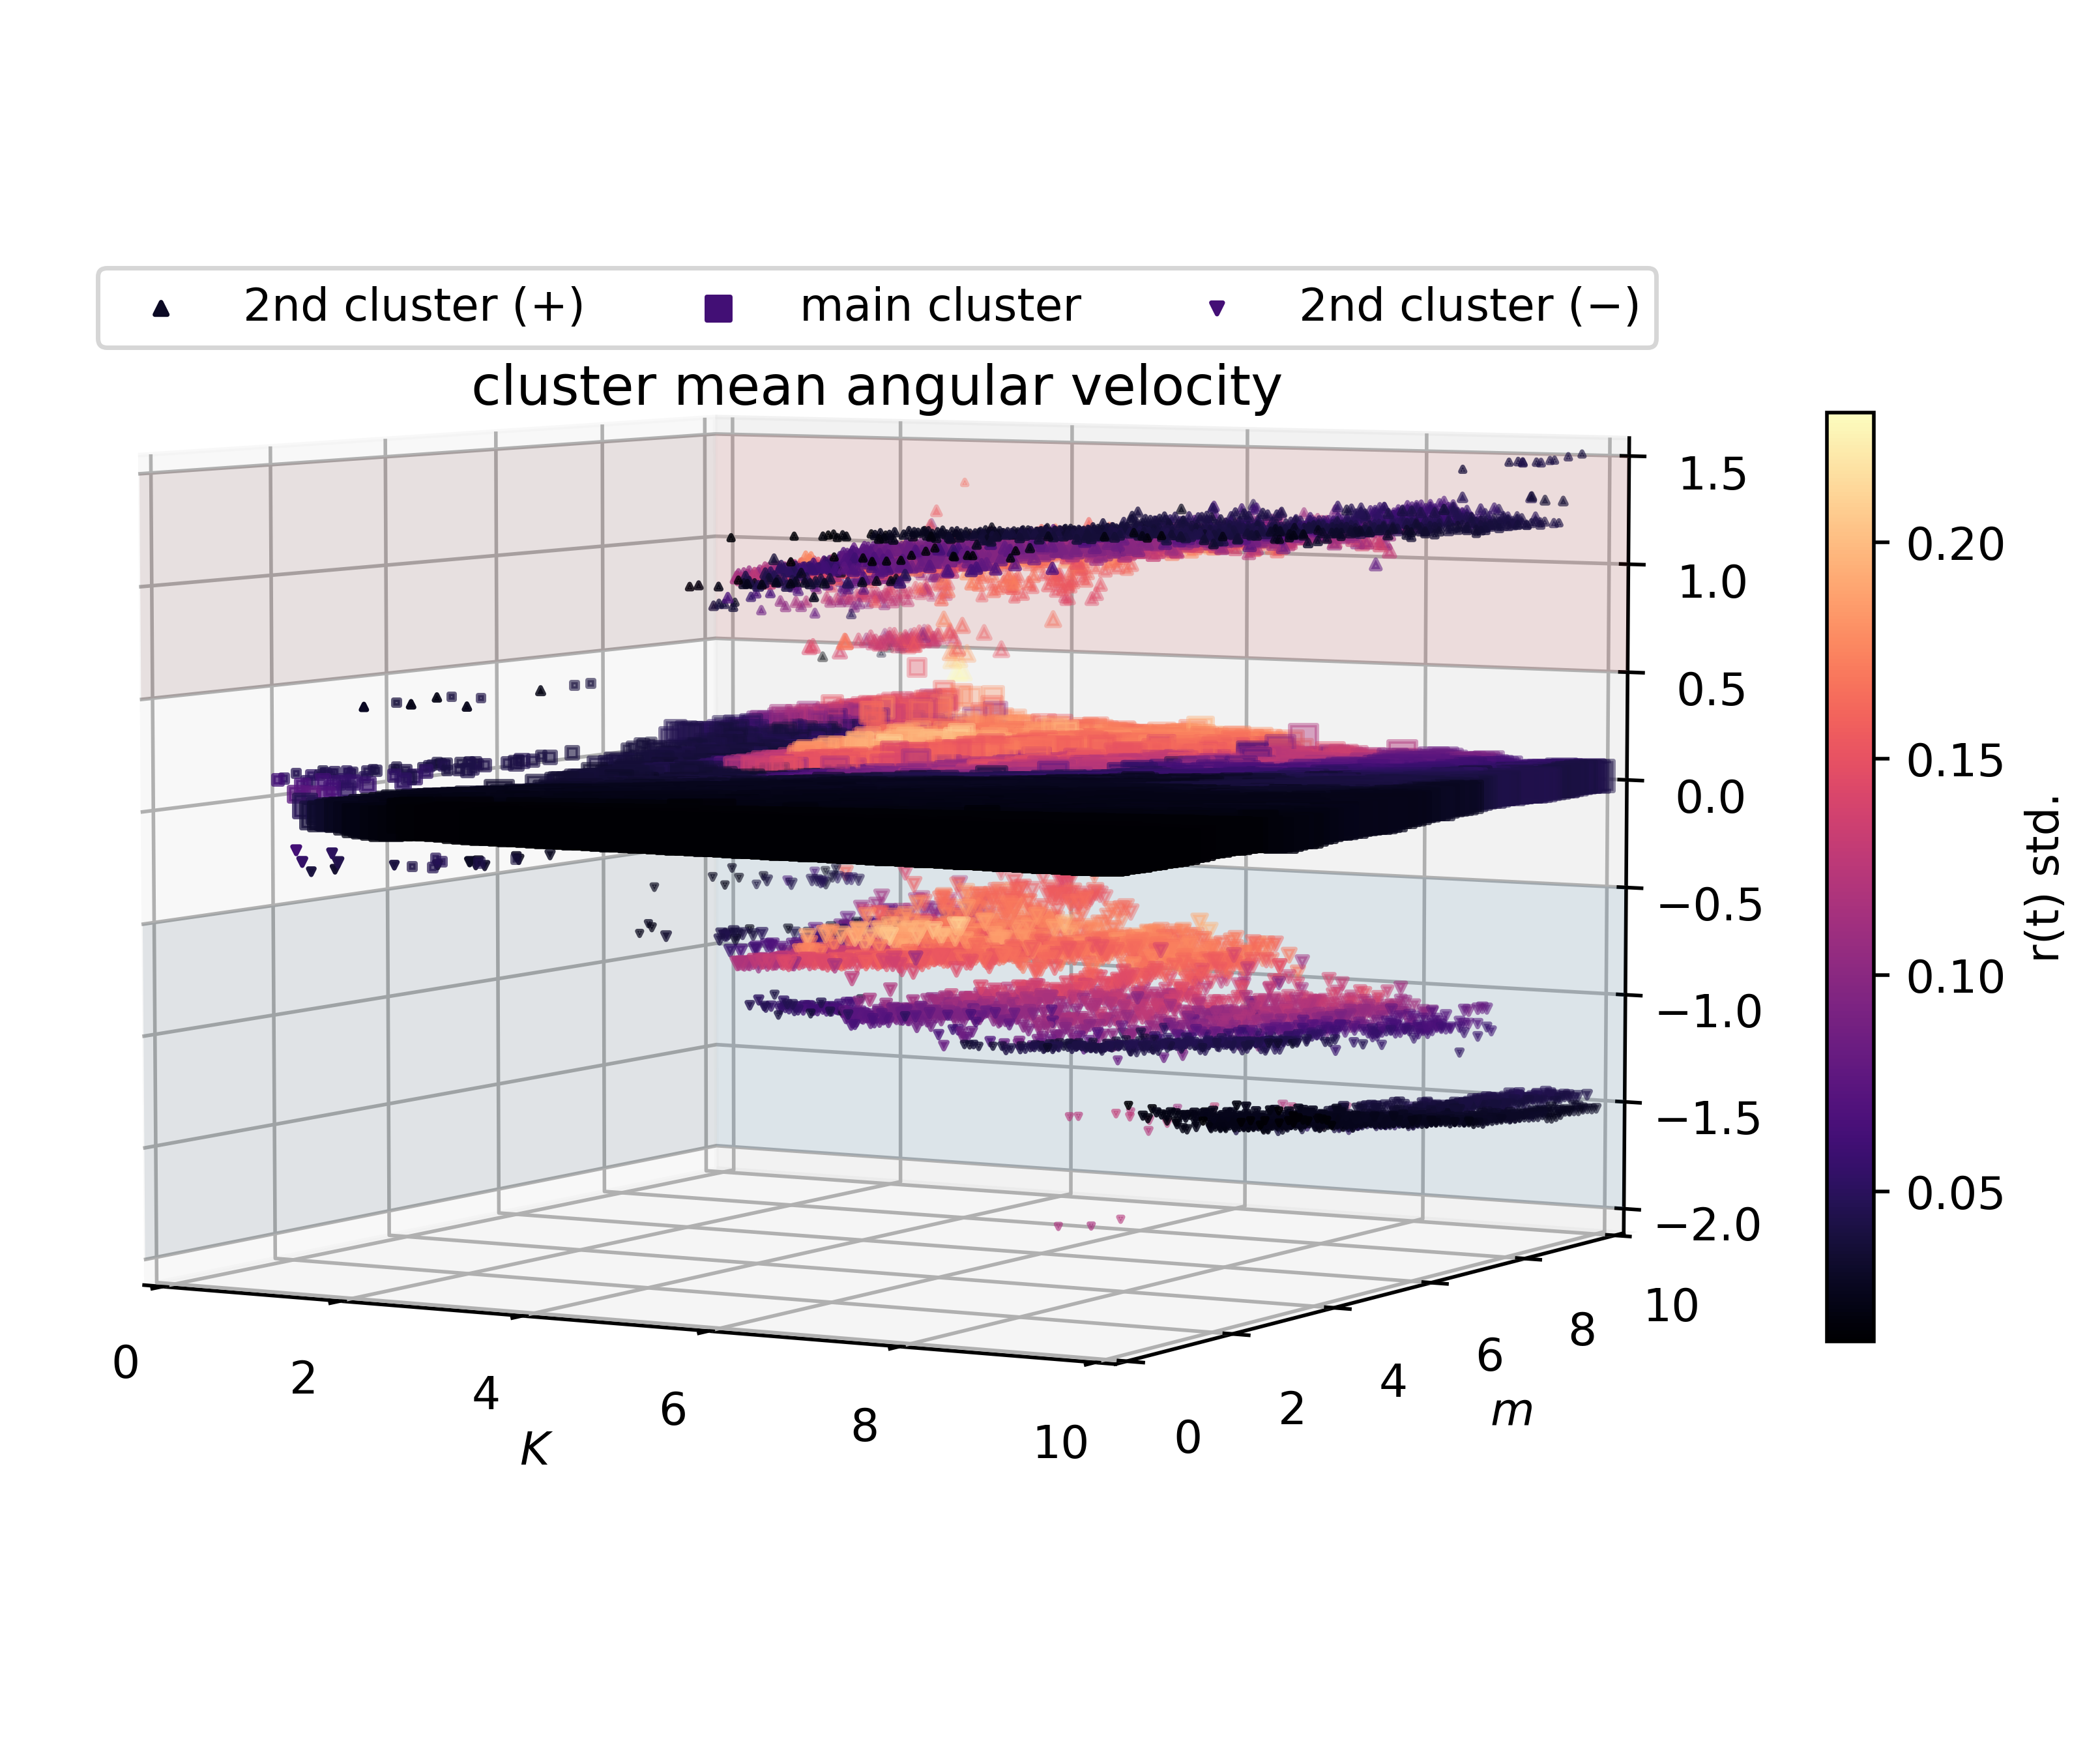

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

K = df['K']
m = df['m']
rstd = df[r'$r$\'s temporal std']
O = df['cluster mean phase velocity']
S = df['cluster size']
marker = df['type'].map({'main':'s','2nd cluster(-)':'v','2nd cluster(+)':'^'})

fig = plt.figure(figsize=(7,6),dpi=500)
ax = plt.subplot(projection='3d')
for marker,type_,label in zip(['^','s','v'],['2nd cluster(+)','main', '2nd cluster(-)'],[r'2nd cluster $(+)$','main cluster' , r'2nd cluster $(-)$']):
    df_temp = df.query(f'type == \'{type_}\'')
    K = df_temp['K']
    m = df_temp['m']
    rstd = df_temp[r'$r$\'s temporal std']
    O = df_temp['cluster mean phase velocity']
    S = df_temp['cluster size']
    sca = ax.scatter(K,m,O,s=S*0.1,c=rstd,cmap='magma',marker=marker,label =label)
bar = plt.colorbar(sca,shrink=0.5)
bar.set_label(r'r(t) std.')
bar.set_ticks([0.05,0.1,0.15,0.2])
# ax.set_xlabel('$K$ : coupling constant')
# ax.set_ylabel('$m$ : inertia')

ax.set_xlabel(r'$K$')
ax.set_ylabel(r'$m$')
ax.set_title('cluster mean angular velocity',y=0.83)
# bar.set_label(r'$r$ temporal std.')
ax.view_init(elev=5., azim=-60, roll=0)
# ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.3))
ax.set_xlim([0,10])
ax.set_ylim([0,10])
# ax.set_zlim([-1.8,1.8])
ax.set_xmargin(0)
ax.set_ymargin(0)
ax.set_zmargin(0)

yy, zz = np.meshgrid([-0.2,10.2], [0.5,1.5])
xx = yy*0-0.2
ax.plot_surface(xx, yy, zz,alpha=0.1,color ='tab:red')

xx, zz = np.meshgrid([-0.2,10.2], [0.5,1.5])
yy = yy*0+10.2
ax.plot_surface(xx, yy, zz,alpha=0.1,color ='tab:red')

yy, zz = np.meshgrid([-0.2,10.2], [-2.0,-0.5])
xx = yy*0-0.2
ax.plot_surface(xx, yy, zz,alpha=0.1,color ='tab:blue')

xx, zz = np.meshgrid([-0.2,10.2], [-2.0,-0.5])
yy = yy*0+10.2
ax.plot_surface(xx, yy, zz,alpha=0.1,color ='tab:blue')

ax.legend(loc=8,ncols=3,bbox_to_anchor=(0.5, 0.80))
fig.tight_layout()
plt.savefig('230721 statphys poster/total.png',transparent=True,dpi=300)
plt.show()


In [1188]:
df_new['p_s_0'].describe()


count    2603.000000
mean       43.190165
std        14.983605
min        11.000000
25%        30.000000
50%        48.000000
75%        55.000000
max       141.000000
Name: p_s_0, dtype: float64

In [ ]:
-1.107522,-0.144122

In [1479]:
import seaborn as sns

(array([[16.,  9.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [20., 13.,  9.,  7.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [25., 25., 25., 22., 17., 15., 14., 15., 14., 14., 16., 16., 15.,
         17., 20., 17., 18., 20., 21., 28.],
        [20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
         20., 20., 20., 19., 19., 19., 23.],
        [20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
         19., 20., 20., 18., 20., 20., 21.],
        [25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,
         25., 25., 25., 25., 25., 25., 30.],
        [20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
         20., 20., 20., 20., 20., 20., 24.],
        [25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,
         25., 25., 25., 25., 23., 24., 30.],
        [20., 20., 20., 20., 20., 20., 20., 20.,

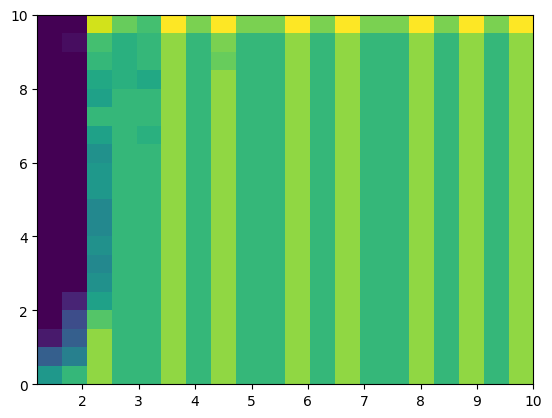

In [1485]:
plt.hist2d(df_data.query('type == \'main\'')['K'],df_data.query('type == \'main\'')['m'],bins=20)

In [1480]:
sns.histogram2d(df_data.query('type == \'main\''),x='K',y='m',)

AttributeError: module 'seaborn' has no attribute 'histogram2d'

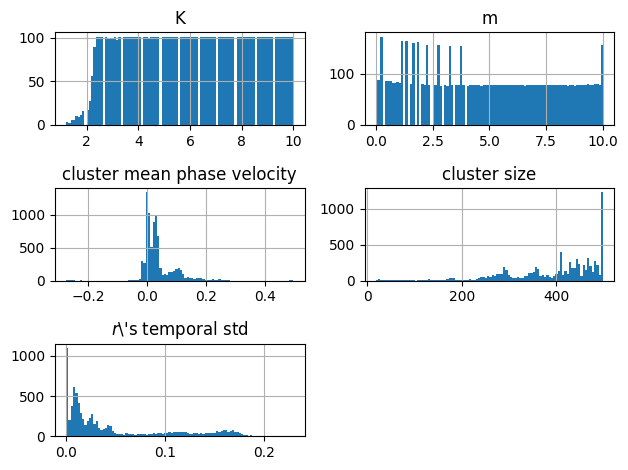

In [1376]:
df_data.query('type == \'main\'').hist(bins=100)
plt.tight_layout()


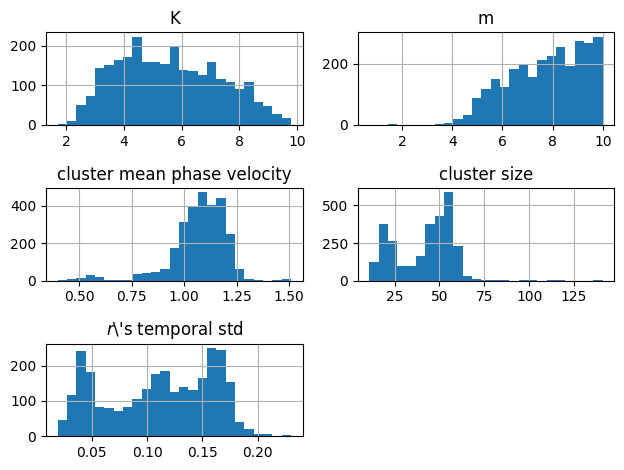

In [1418]:
df_data.query('type == \'2nd cluster(+)\'').hist(bins=25)
plt.tight_layout()

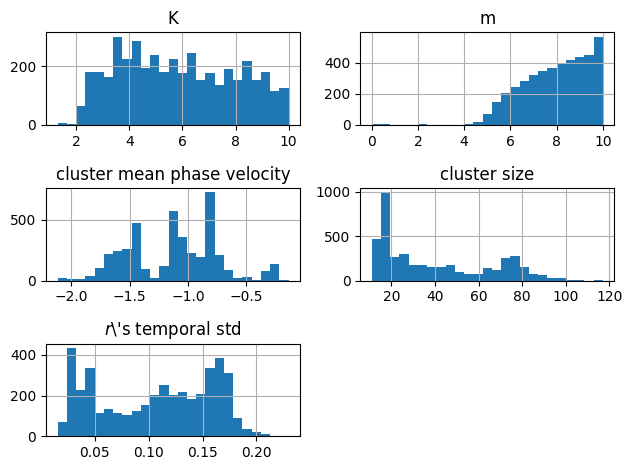

In [1419]:
df_data.query('type == \'2nd cluster(-)\'').hist(bins=25)
plt.tight_layout()

In [1132]:
df_data['type'].value_counts()

main              7990
2nd cluster(-)    3834
2nd cluster(+)    2619
Name: type, dtype: int64

In [1330]:
def beta(gamma):
    if gamma>4: return 1
    elif (gamma>3)&(gamma<4):return 1/(gamma-3)
    elif (gamma>2)&(gamma<3):return 1+(gamma-2)/(1-(gamma-2)**2)
    else: return np.nan

In [1337]:
gammas = np.linspace(2,6,200)
betas = list(map(beta,gammas))

[]

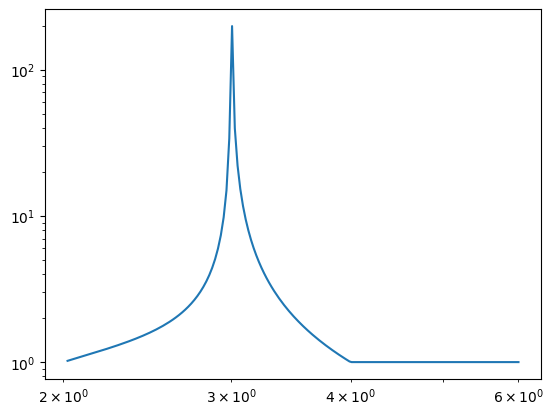

In [1339]:
plt.plot(gammas,betas)
plt.loglog()

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_1292/1112163154.py:15: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



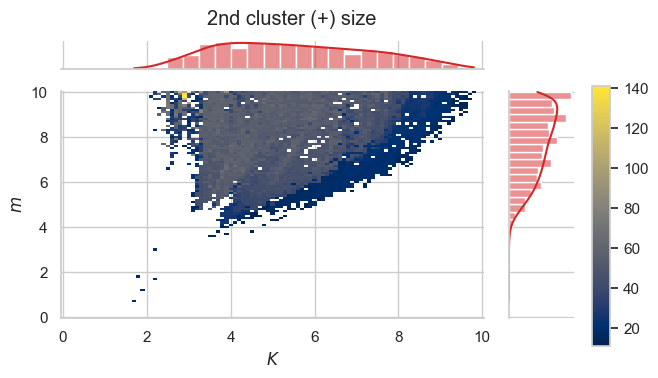

In [1592]:

g = sns.jointplot(df_data.query('type == \'2nd cluster(+)\''), x="K", y="m",kind='reg',color='tab:red')
g.ax_joint.cla()
fig = plt.gcf()
fig.set_figwidth(6)
fig.set_figheight(4)
plt.sca(g.ax_joint)
CS=plt.pcolormesh(KK,MM,df_new['p_s_0'].unstack().to_numpy().T,zorder=2,cmap='')
# cbar_ax = g.fig.add_axes([0.1,0.2,0.8,0.1])
plt.xlabel(r'$K$')
plt.ylabel(r'$m$')
cbar_ax = g.fig.add_axes([1, 0.1, .03, .65])
cb = plt.colorbar(cax=cbar_ax)
# plt.title('cluster size')
plt.suptitle('2nd cluster (+) size',y=0.94)
plt.tight_layout()
plt.savefig('23 statphys poster/plus_size.png',dpi=300,transparent=True)
# plt.title('adsf')
# plt.colorbar(CS)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_1292/2144893644.py:15: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



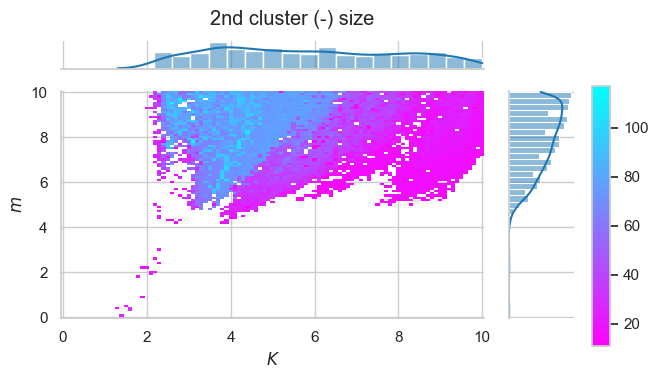

In [1595]:

g = sns.jointplot(df_data.query('type == \'2nd cluster(-)\''), x="K", y="m",kind='reg',color='tab:blue')
g.ax_joint.cla()
fig = plt.gcf()
fig.set_figwidth(6)
fig.set_figheight(4)
plt.sca(g.ax_joint)
CS=plt.pcolormesh(KK,MM,df_new['m_s_0'].unstack().to_numpy().T,zorder=2,cmap='cool_r')
# cbar_ax = g.fig.add_axes([0.1,0.2,0.8,0.1])
plt.xlabel(r'$K$')
plt.ylabel(r'$m$')
cbar_ax = g.fig.add_axes([1, 0.1, .03, .65])
cb = plt.colorbar(cax=cbar_ax)
# plt.title('cluster size')
plt.suptitle('2nd cluster (-) size',y=0.94)
plt.tight_layout()
# plt.savefig('23 statphys poster/minus_size.png',dpi=300,transparent=True)
# plt.title('adsf')
# plt.colorbar(CS)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_1292/2691925090.py:15: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



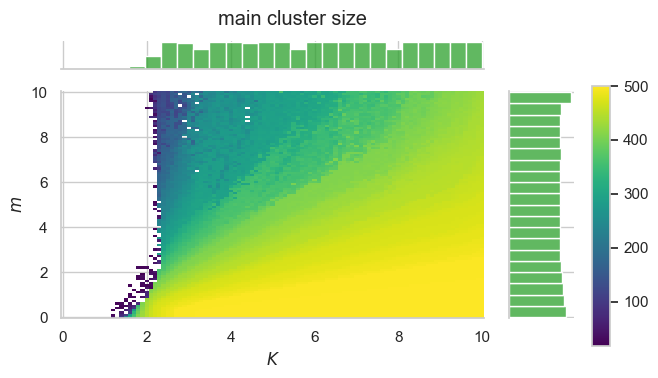

In [1588]:

g = sns.jointplot(df_data.query('type == \'main\''), x="K", y="m",color='tab:green',alpha=0.8)
g.ax_joint.cla()
fig = plt.gcf()
fig.set_figwidth(6)
fig.set_figheight(4)
plt.sca(g.ax_joint)
CS=plt.pcolormesh(KK,MM,df_new['main_s'].unstack().to_numpy().T,zorder=2,cmap='viridis')
# cbar_ax = g.fig.add_axes([0.1,0.2,0.8,0.1])
plt.xlabel(r'$K$')
plt.ylabel(r'$m$')
cbar_ax = g.fig.add_axes([1, 0.1, .03, .65])
cb = plt.colorbar(cax=cbar_ax)
# plt.title('cluster size')
plt.suptitle('main cluster size',y=0.94)
plt.tight_layout()
# plt.savefig('23 statphys poster/temp.png',dpi=300,transparent=True)
# plt.title('adsf')
# plt.colorbar(CS)

In [1501]:
df_data

K     m  cluster mean phase velocity  cluster size            type  \
0       1.2   0.0                     0.163407          41.0            main   
1       1.4   0.0                     0.105102          98.0            main   
2       1.4   0.0                    -0.144122          27.0  2nd cluster(-)   
3       1.5   0.0                     0.055053         229.0            main   
4       1.6   0.0                     0.015495         314.0            main   
...     ...   ...                          ...           ...             ...   
15084   9.8  10.0                     1.508945          11.0  2nd cluster(+)   
15085   9.9  10.0                     0.025803         427.0            main   
15086   9.9  10.0                    -1.465150          25.0  2nd cluster(-)   
15087  10.0  10.0                     0.022897         432.0            main   
15088  10.0  10.0                    -1.526074          19.0  2nd cluster(-)   

       $r$\'s temporal std  
0                 0.050077  
1                 0.062979  
2                 0.062979  
3                 0.033474  
4                 0.024876  
...                    ...  
15084             0.042636  
15085             0.042307  
15086             0.042307  
15087             0.029398  
15088             0.029398  

[15089 rows x 6 columns]

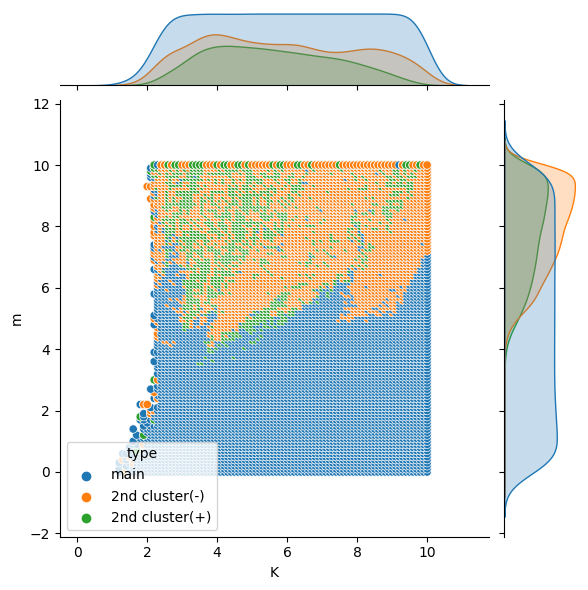

In [1502]:
g = sns.jointplot(df_data, x="K", y="m",hue='type',sizes='cluster size')


In [1507]:
df_data.query('type == \'2nd cluster(-)\'')

K     m  cluster mean phase velocity  cluster size            type  \
2       1.4   0.0                    -0.144122          27.0  2nd cluster(-)   
91      1.4   0.1                    -0.199332          27.0  2nd cluster(-)   
267     1.6   0.3                    -0.164172          26.0  2nd cluster(-)   
353     1.3   0.4                    -0.255571          19.0  2nd cluster(-)   
356     1.6   0.4                    -0.208454          33.0  2nd cluster(-)   
...     ...   ...                          ...           ...             ...   
15079   9.6  10.0                    -1.553522          18.0  2nd cluster(-)   
15081   9.7  10.0                    -1.472186          26.0  2nd cluster(-)   
15083   9.8  10.0                    -1.472945          25.0  2nd cluster(-)   
15086   9.9  10.0                    -1.465150          25.0  2nd cluster(-)   
15088  10.0  10.0                    -1.526074          19.0  2nd cluster(-)   

       $r$\'s temporal std  
2                 0.062979  
91                0.054063  
267               0.050194  
353               0.038704  
356               0.044418  
...                    ...  
15079             0.039489  
15081             0.044789  
15083             0.042636  
15086             0.042307  
15088             0.029398  

[4273 rows x 6 columns]

AttributeError: QuadMesh.set() got an unexpected keyword argument 'colors'

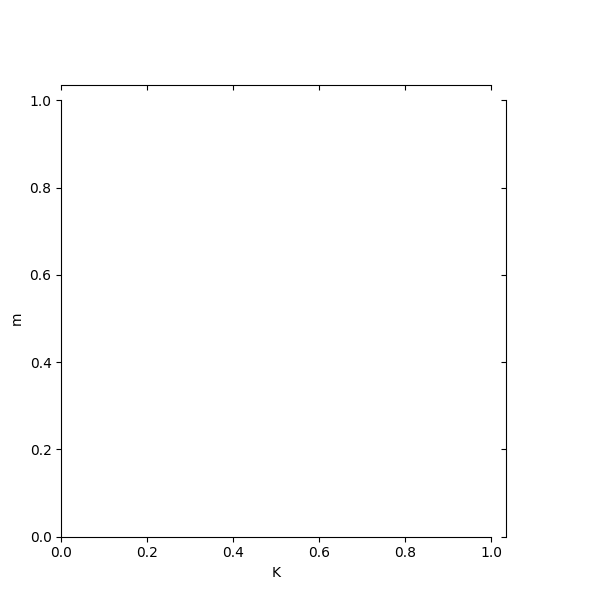

In [1506]:

g = sns.jointplot(df_data.query('type == \'2nd cluster(-)\''), x="K", y="m", kind="hist",colors='cluster size')
